# Project 6 :  Unsupervised Learning - AllLife Bank Customer Segmentation

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 03/11/2022
---

# Description

## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


## Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).


## Data Dictionary

1. Sl_No: Primary key of the records
2. Customer Key: Customer identification number
3. Average Credit Limit: Average credit limit of each customer for all credit cards
4. Total credit cards: Total number of credit cards possessed by the customer
5. Total visits bank: Total number of visits that customer made (yearly) personally to the bank
6. Total visits online: Total number of visits or online logins made by the customer (yearly)
7. Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)


---

### 1. Import  Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# to set background color in plots
sns.set(color_codes=True)

<IPython.core.display.Javascript object>

### 2. Load Data

In [3]:
# Read data from excel file using pandas and create DataFrame object as Analytic Base Table
alllife_data_ABT = pd.read_excel("Credit Card Customer Data.xlsx")

<IPython.core.display.Javascript object>

In [4]:
# Make a copy of Analytic Base Table
alllife_data = alllife_data_ABT.copy()

<IPython.core.display.Javascript object>

### 3. View Data

In [5]:
# checking number of columns and rows
print(f"There are {alllife_data.shape[0]} rows and {alllife_data.shape[1]} columns.")

There are 660 rows and 7 columns.


<IPython.core.display.Javascript object>

In [6]:
# Check datatypes of each columns
alllife_data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

<IPython.core.display.Javascript object>

#### Observation : 
1. Column names and its data types are listed
2. All columns are integer data type
3. Column "Sl_No" and "Customer Key" may be unique values

In [7]:
# Additional check on data for null values
alllife_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

#### Observation : 
1. Row index is from 0 to 659. Total rows is 660
2. Column index is from 0 to 6. Total columns is 7
3. There are no null values in columns. However, they are integer data types, so must further check for zeroes as well.
4. There is no target variable because this problem is for clustering which is unsupervised learning technique

In [8]:
# Check head
alllife_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [9]:
# Check tail
alllife_data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [10]:
# Check sample
alllife_data.sample(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
191,192,48510,10000,2,1,3,6
450,451,11265,51000,7,3,2,0
602,603,67415,37000,7,4,0,1
437,438,87219,54000,6,3,0,2
54,55,78503,14000,2,0,4,9


<IPython.core.display.Javascript object>

In [11]:
# Check basic summary
alllife_data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

#### Observation : 
1. "Sl_No" seems to be unique serial number.
2. "Customer Key" seems to be key customer identification number.
3. "Avg_Credit_Limit" seems to be in currency and are large numbers compared to other column values.
4. "Total_Credit_Cards" seems to be small numbers.
5. "Total_visits_bank" seems to be small numbers.
6. "Total_visits_online" seems to be small numbers.
7. "Total_calls_made" seems to be small numbers.
8. Scaling is definitely required for distance calculation in clustering techniques.
9. There are no missing values.

### 4. Exploratory Data Analysis

#### A. Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(data, column, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="lightsalmon")
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, color="cornflowerblue"
    ) if bins else sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, color="cornflowerblue"
    )
    ax_hist2.axvline(data[column].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[column].median(), color="black", linestyle="-")
    plt.show()

<IPython.core.display.Javascript object>

In [13]:
# function to create labeled barplots


def labeled_barplot(data, column, perc=False, n=None, h=None, fig_size=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[column])  # length of the column
    count = data[column].nunique()

    if h is None:
        l = 0
    else:
        l = 20

    if fig_size is not None:
        plt.figure(figsize=(fig_size))
    else:
        if n is None:
            plt.figure(figsize=(l + count + 1, 5))
        else:
            plt.figure(figsize=(l + n + 2, 5))

    plt.xticks(rotation=45, fontsize=13)
    ax = sns.countplot(
        data=data,
        x=column,
        hue=h,
        palette="pastel",
        order=data[column].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<IPython.core.display.Javascript object>

In [14]:
# Check datatypes of columns and apply above function to numerical columns
alllife_data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

<IPython.core.display.Javascript object>

##### Univariate Analysis - Column "Avg_Credit_Limit"

In [15]:
# Basic summary
alllife_data[["Avg_Credit_Limit"]].describe()

,Avg_Credit_Limit
count,660.000000
mean,34574.242424
std,37625.487804
min,3000.000000
25%,10000.000000
50%,18000.000000
75%,48000.000000
max,200000.000000


<IPython.core.display.Javascript object>

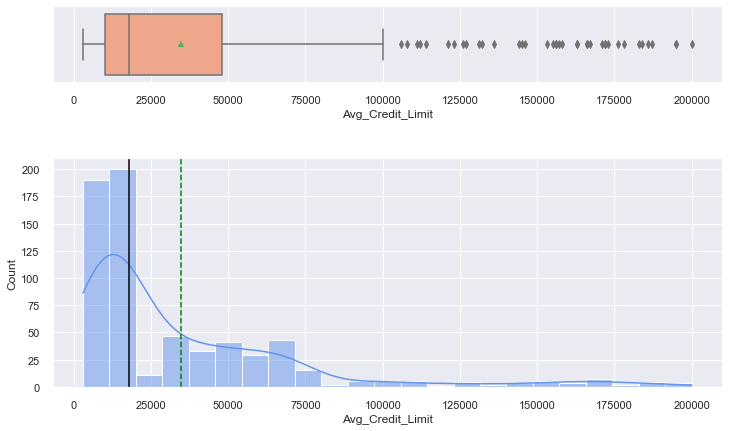

<IPython.core.display.Javascript object>

In [16]:
# Visualize data through plot
hist_boxplot(alllife_data, "Avg_Credit_Limit", kde=True)

#### Observation of  column "Avg_Credit_Limit": 
1. It doesn't like a normal distribution.
2. It is heavily right skewed.
3. It has lot of outliers. But, they looks like genuine cases and they could form a potential cluster. 
4. Mean and Median are not same.
5. Mean is 34574 and median is 18000.
6. There are no missing values.

##### Univariate Analysis - Column "Total_Credit_Cards"

In [17]:
# Basic summary
alllife_data[["Total_Credit_Cards"]].describe()

,Total_Credit_Cards
count,660.000000
mean,4.706061
std,2.167835
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,10.000000


<IPython.core.display.Javascript object>

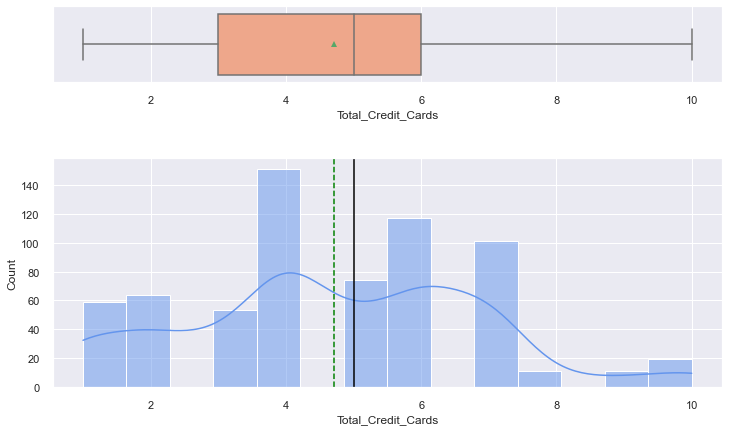

<IPython.core.display.Javascript object>

In [18]:
# Visualize data through plot
hist_boxplot(alllife_data, "Total_Credit_Cards", kde=True)

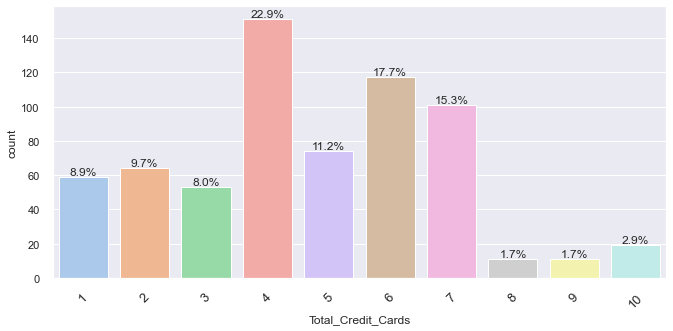

<IPython.core.display.Javascript object>

In [19]:
# Visualize data through plot
labeled_barplot(alllife_data, "Total_Credit_Cards", perc=True)

#### Observation of  column "Total_Credit_Cards": 
1. It doesn't like a normal distribution. But, KDE shows there are two peaks which could mean atleast two clusters.
2. It is not skewed.
3. It has no outliers. 
4. Mean and Median are almost same.
5. Mean is 4.7 and median is 5.
6. There are no missing values. No zeroes.
7. Most of customers has 4 Credit Cards (22.9%). Followed by 6 Credit Cards (17.7%) and 7 Credit Cards (15.3%)

##### Univariate Analysis - Column "Total_visits_bank"

In [20]:
# Basic summary
alllife_data[["Total_visits_bank"]].describe()

,Total_visits_bank
count,660.000000
mean,2.403030
std,1.631813
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


<IPython.core.display.Javascript object>

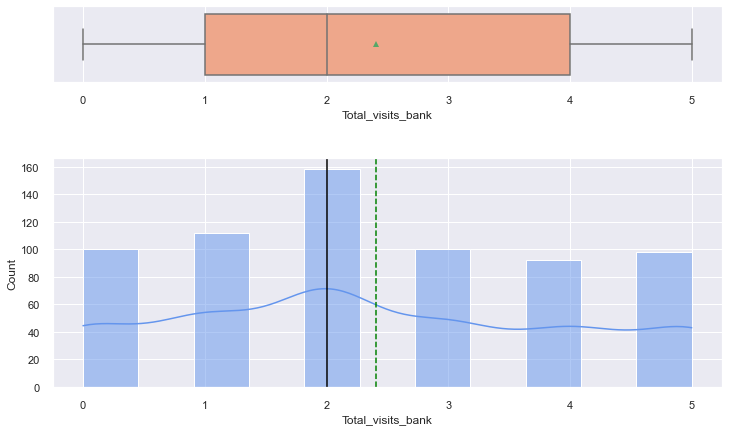

<IPython.core.display.Javascript object>

In [21]:
# Visualize data through plot
hist_boxplot(alllife_data, "Total_visits_bank", kde=True)

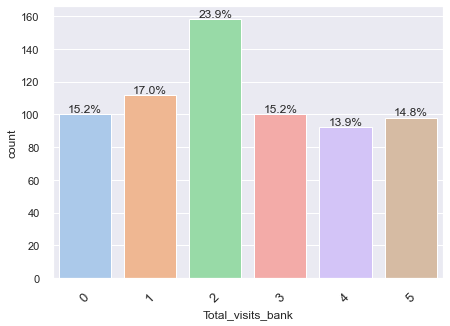

<IPython.core.display.Javascript object>

In [22]:
# Visualize data through plot
labeled_barplot(alllife_data, "Total_visits_bank", perc=True)

#### Observation of  column "Total_visits_bank": 
1. It slightly look like a normal distribution. KDE shows only one peak.
2. It is not skewed.
3. It has no outliers. 
4. Mean and Median are almost same.
5. Mean is 2.4 and median is 2.
6. There are no missing values. Zero values may mean customer didnt visit bank even for one time.
7. Most of customers has 2 visits (23.9%). Followed by 1 visit (17.0%) and 0 visits (15.2%)

##### Univariate Analysis - Column "Total_visits_online"

In [23]:
# Basic summary
alllife_data[["Total_visits_online"]].describe()

,Total_visits_online
count,660.000000
mean,2.606061
std,2.935724
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,15.000000


<IPython.core.display.Javascript object>

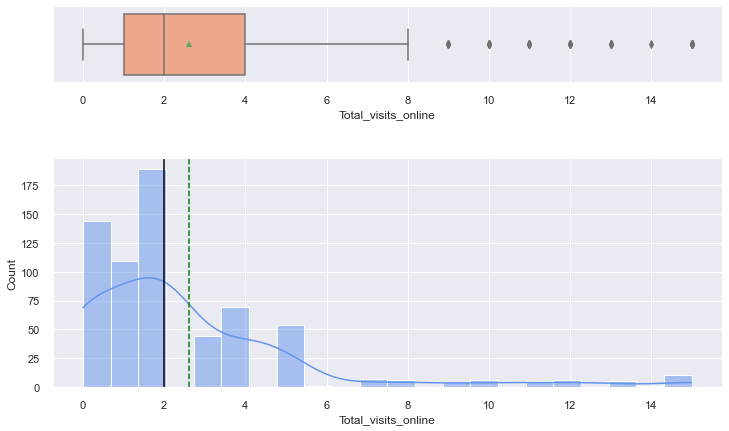

<IPython.core.display.Javascript object>

In [24]:
# Visualize data through plot
hist_boxplot(alllife_data, "Total_visits_online", kde=True)

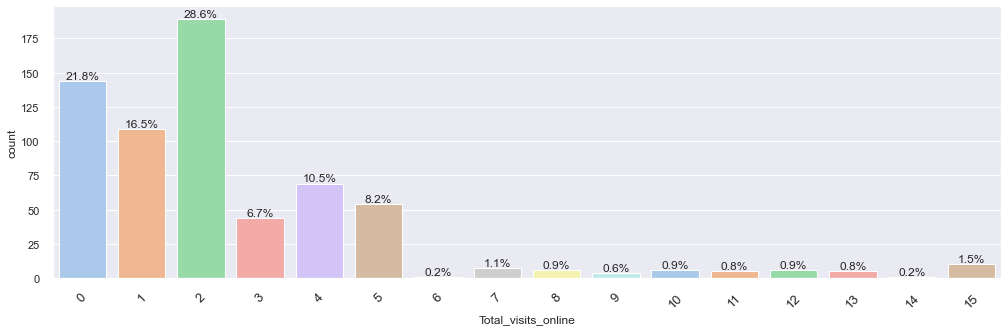

<IPython.core.display.Javascript object>

In [25]:
# Visualize data through plot
labeled_barplot(alllife_data, "Total_visits_online", perc=True)

#### Observation of  column "Total_visits_online": 
1. It doesn't like a normal distribution. But, KDE shows there are two peaks which could mean atleast two clusters.
2. It is right skewed.
3. It has outliers. But, they looks like genuine values and could mean a potential cluster.
4. Mean and Median are almost same.
5. Mean is 2.6 and median is 2.
6. There are no missing values. Zero values could mean customers havent visited bank online at all.
7. Most of customers has 2 visits online (28.6%). Followed by 0 visits online (21.8%) and 1 visits online (16.5%)

##### Univariate Analysis - Column "Total_calls_made"

In [26]:
# Basic summary
alllife_data[["Total_calls_made"]].describe()

,Total_calls_made
count,660.000000
mean,3.583333
std,2.865317
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,10.000000


<IPython.core.display.Javascript object>

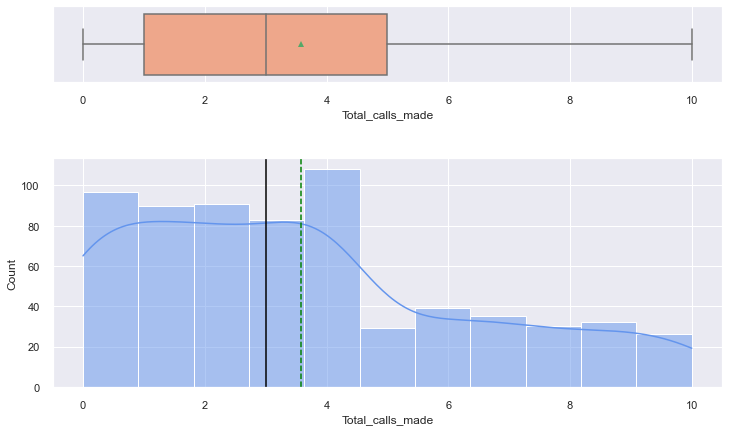

<IPython.core.display.Javascript object>

In [27]:
# Visualize data through plot
hist_boxplot(alllife_data, "Total_calls_made", kde=True)

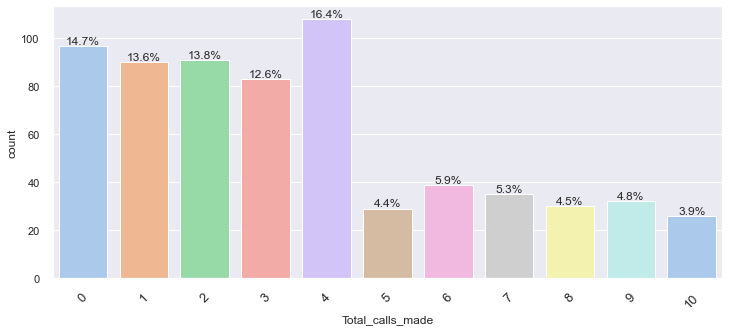

<IPython.core.display.Javascript object>

In [28]:
# Visualize data through plot
labeled_barplot(alllife_data, "Total_calls_made", perc=True)

#### Observation of  column "Total_calls_made": 
1. It doesn't like a normal distribution. But, KDE shows there are two possible clusters.
2. It is not skewed.
3. It has no outliers. 
4. Mean and Median are almost same.
5. Mean is 3.5 and median is 3.
6. There are no missing values. Zeroes could mean customer havent made any calls.
7. Most of customers has 4 calls made (16.4%). Followed by 0 calls made (14.7%) and 2 calls made (13.8%)

#### B. Bivariate & Multivariate Analysis

In [29]:
# Get column and its datatypes for bivariate analysis
alllife_data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

<IPython.core.display.Javascript object>

In [30]:
# Get correlation between each numerical feature
alllife_data.iloc[:, 2:].corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<IPython.core.display.Javascript object>

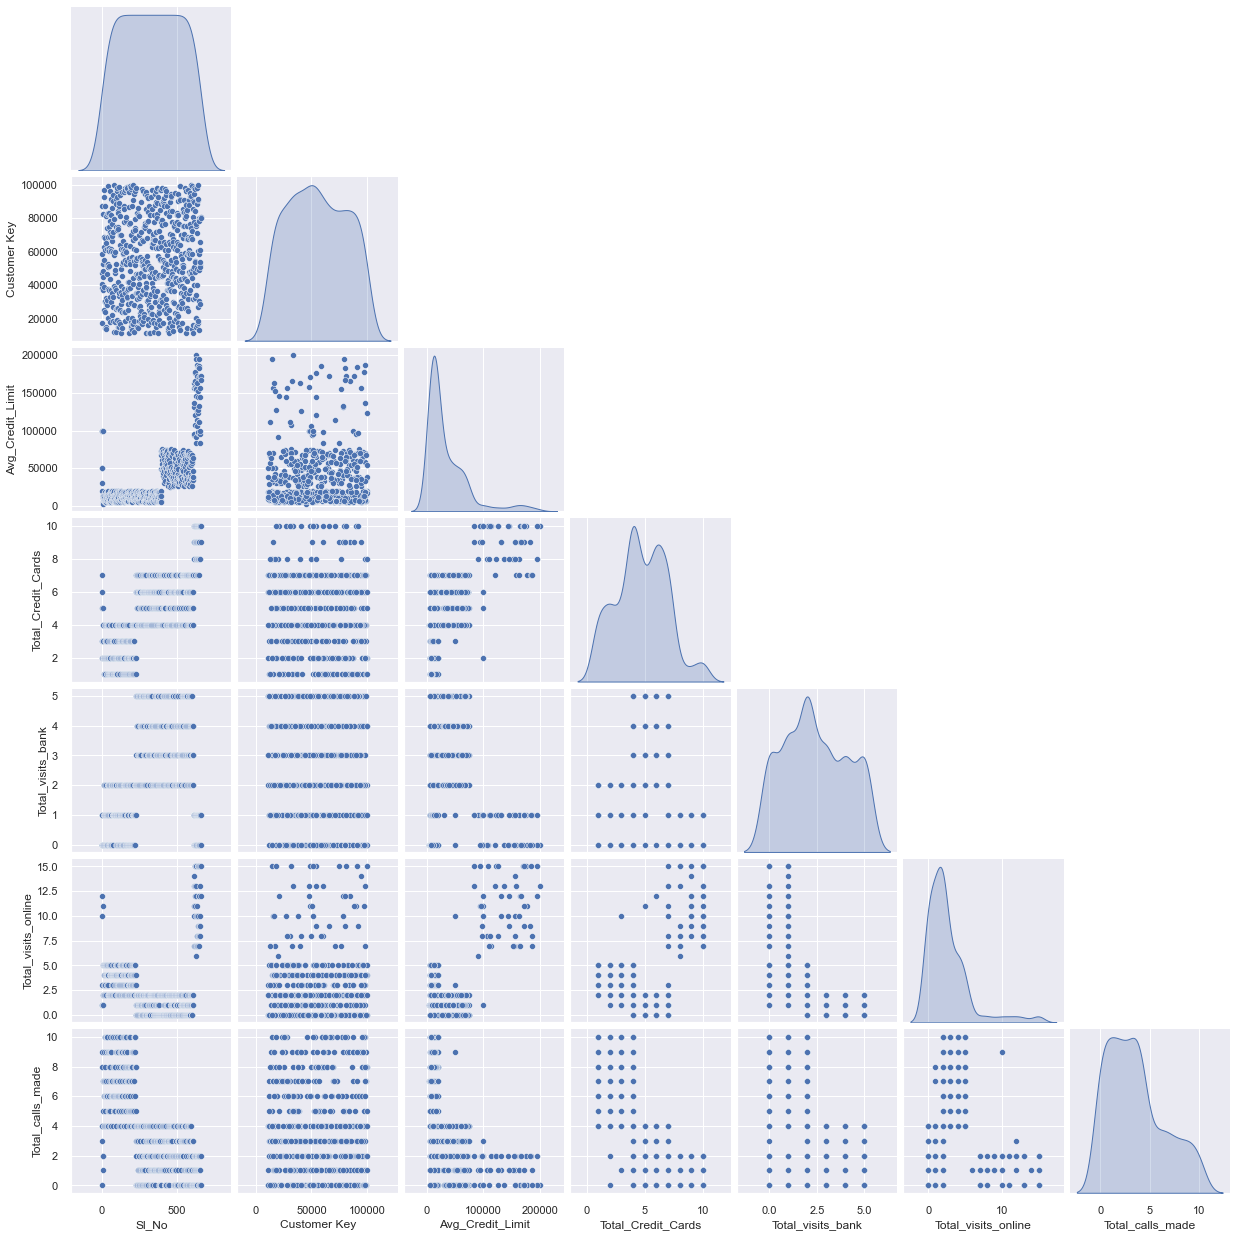

<IPython.core.display.Javascript object>

In [31]:
# Compare each numerical continous feature against each other
sns.pairplot(alllife_data, palette="Set2", diag_kind="kde", corner=True)

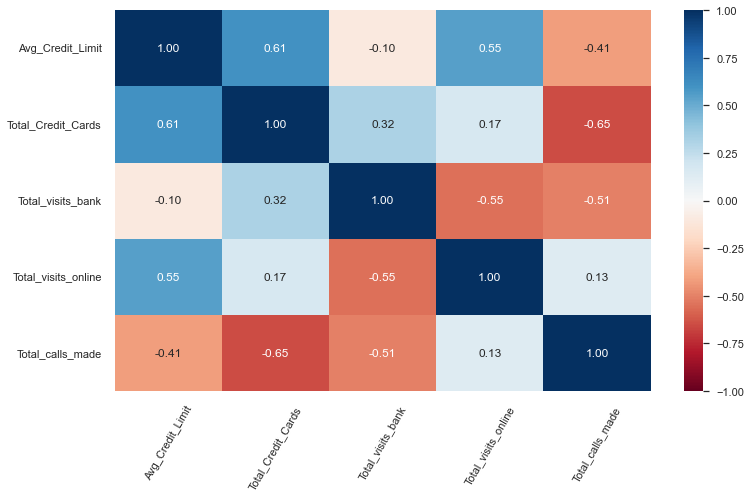

<IPython.core.display.Javascript object>

In [32]:
# Check heatmap for correlation
plt.figure(figsize=(12, 7))
sns.heatmap(
    alllife_data.iloc[:, 2:].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="RdBu",
    linewidths=0.0035,
    linecolor="black",
)
plt.xticks(rotation=60)
plt.show()

#### Observation  on correlation between multiple variables:

1. There are higher positive correlation between below features:

    a) Average Credit Limit and Total Credit Cards. This is obvious because total credit cards increases credit limit as well
    
    b) Average Credit Limit and Total Visits Online. Looks like customers who have more credit limit are experts in managing their credit cards through online.
    
    

2. There are higher negative correlation between below features:

    a) Average Credit Limit vs Total Calls Made. Looks like customers who have more credit limit doesnt make calls, but, instead they use other means such as online.
    
    b) Total Credit Cards vs Total Calls Made. Looks like customers who have more credit card doesnt make calls, but, instead they use other means such as online.
    
    c) Total Visits Bank vs Total Visits Online and Total Calls Made. Looks like customers visiting banks directly do no use other services like online and calls.




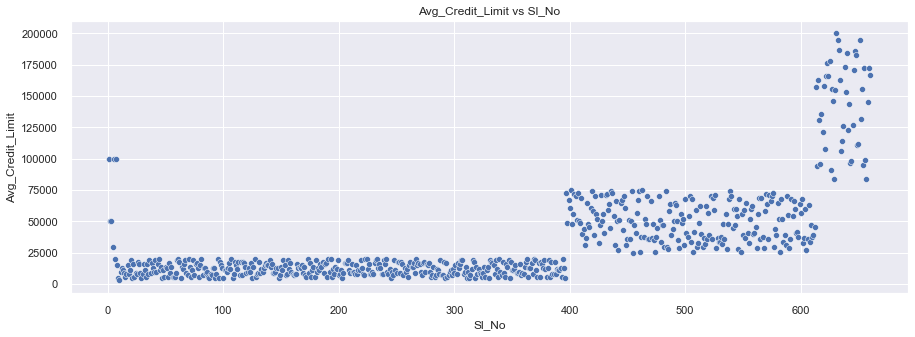

<IPython.core.display.Javascript object>

In [33]:
# Plot "Avg_Credit_Limit vs Sl_No" comparison
plt.figure(figsize=(15, 5))
sns.scatterplot(
    data=alllife_data, x="Sl_No", y="Avg_Credit_Limit", palette="Set2",
).set(title="Avg_Credit_Limit vs Sl_No")
plt.show()

#### Observation  "Avg_Credit_Limit vs Sl_No": 

1. There seems to be three distinct clusters for Average Credit Limit. 

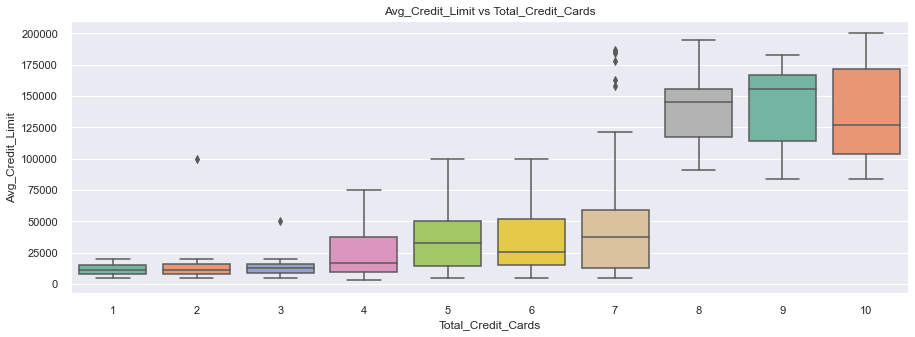

<IPython.core.display.Javascript object>

In [34]:
# Plot "Avg_Credit_Limit vs Total_Credit_Cards" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_Credit_Cards", y="Avg_Credit_Limit", palette="Set2",
).set(title="Avg_Credit_Limit vs Total_Credit_Cards")
plt.show()

#### Observation  "Avg_Credit_Limit vs Total_Credit_Cards": 

1. There seems to be two distinct clusters.
2. There is a chance of three clusters where two clusters seems very close to each other. 
3. Customers who have more than 7 credit cards seems to have average credit limit more than 75000.
4. Customers who have less than 4 credit cards seems to have average credit limit less than 25000.

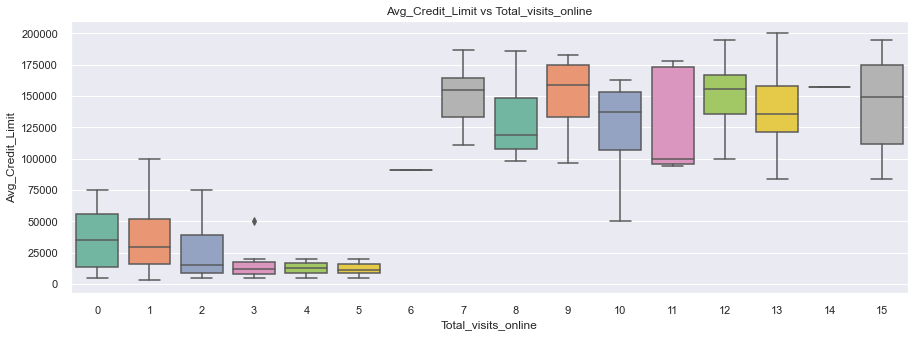

<IPython.core.display.Javascript object>

In [35]:
# Plot "Avg_Credit_Limit vs Total_visits_online" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_visits_online", y="Avg_Credit_Limit", palette="Set2",
).set(title="Avg_Credit_Limit vs Total_visits_online")
plt.show()

#### Observation  "Avg_Credit_Limit vs Total_visits_online": 

1. There seems to be two distinct clusters.
2. Customers who did 6 and more online visits seems to have average credit limit mostly more than 100000.
3. Customers who did less than 6 online visits seems to have average credit limit mostly less than 50000.
4. Customers who have higher average credit card limit tends to use online services.

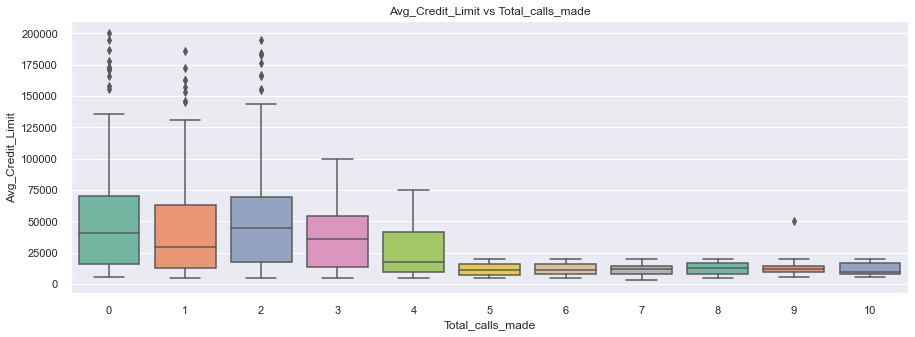

<IPython.core.display.Javascript object>

In [36]:
# Plot "Avg_Credit_Limit vs Total_calls_made" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_calls_made", y="Avg_Credit_Limit", palette="Set2",
).set(title="Avg_Credit_Limit vs Total_calls_made")
plt.show()

#### Observation  "Avg_Credit_Limit vs Total_calls_made": 

1. There seems to be two possible clusters.
2. Customers who did calls 5 and more times seems to have average credit limit mostly less than 25000.
3. Customers who did calls less than 5 seems to have average credit limit mostly more than 25000.
4. Customers who have lower average credit card limit tends to use call services.

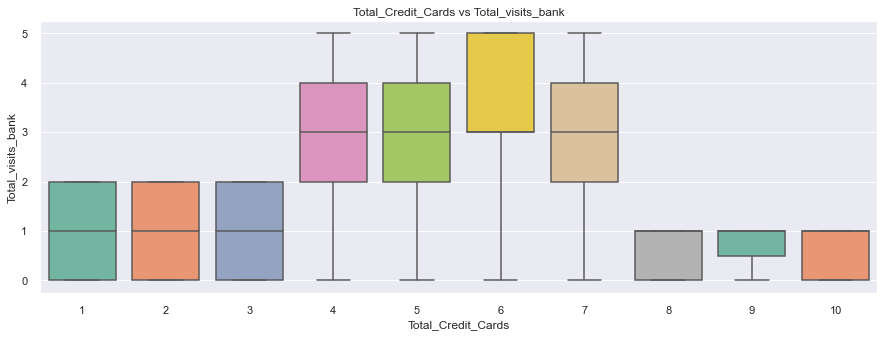

<IPython.core.display.Javascript object>

In [37]:
# Plot "Total_Credit_Cards vs Total_visits_bank" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_Credit_Cards", y="Total_visits_bank", palette="Set2",
).set(title="Total_Credit_Cards vs Total_visits_bank")
plt.show()

#### Observation  "Total_Credit_Cards vs Total_visits_bank": 

1. There seems to be three possible clusters.
2. Customers who have 8 or more credit cards seems to make less than 1 visit to bank.
3. Customers who have credit cards between 4 and 7 seems to make more than 2 visits to bank.
4. Customers who have 3 and less credit cards seems to make less than 2 visits to bank.

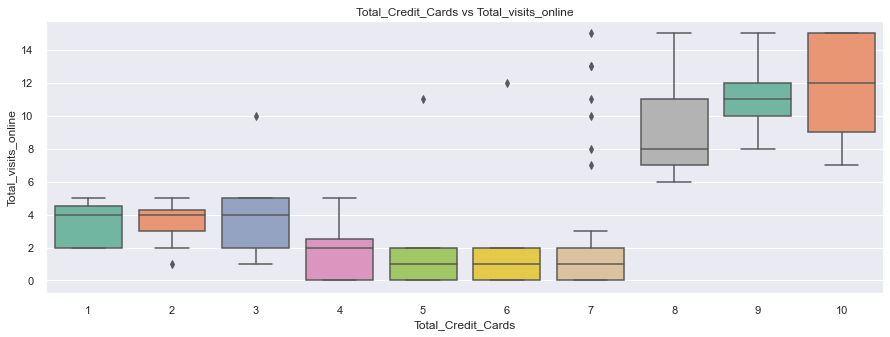

<IPython.core.display.Javascript object>

In [38]:
# Plot "Total_Credit_Cards vs Total_visits_online" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_Credit_Cards", y="Total_visits_online", palette="Set2",
).set(title="Total_Credit_Cards vs Total_visits_online")
plt.show()

#### Observation  "Total_Credit_Cards vs Total_visits_online": 

1. There seems to be two distinct clusters.
2. Customers who have 8 or more credit cards seems to use online services more than 6 times and are active online users.
3. Customers who have credit cards 7 and less seems to use online services less than 6 times.

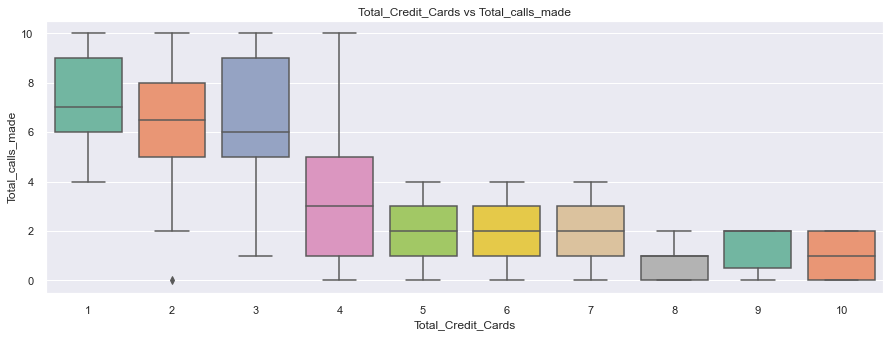

<IPython.core.display.Javascript object>

In [39]:
# Plot "Total_Credit_Cards vs Total_calls_made" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_Credit_Cards", y="Total_calls_made", palette="Set2",
).set(title="Total_Credit_Cards vs Total_calls_made")
plt.show()

#### Observation  "Total_Credit_Cards vs Total_calls_made": 

1. There seems to be two possible clusters.
2. Customers who have 5 and more credit cards seems to make calls less than 4 times.
3. Customers who have 4 and less credit cards seems to make calls more than 4 times and are active users for call services.

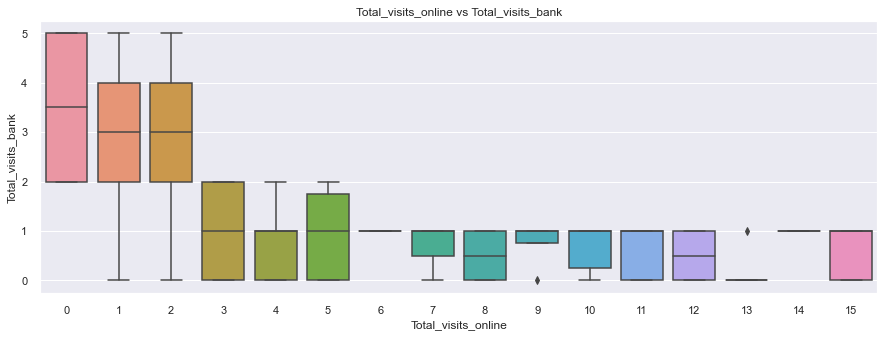

<IPython.core.display.Javascript object>

In [40]:
# Plot "Total_visits_online vs Total_visits_bank" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data,
    x="Total_visits_online",
    y="Total_visits_bank",  # palette="Set2",
).set(title="Total_visits_online vs Total_visits_bank")
plt.show()

#### Observation  "Total_visits_online vs Total_visits_bank": 

1. There seems to be two possible clusters.
2. Customers who make 3 or more online visits goes directly to bank only 2 or less times. They are more online customers.
3. Customers who make 2 or less online visits goes directly to bank more than 2 times. They are more direct banking customers.

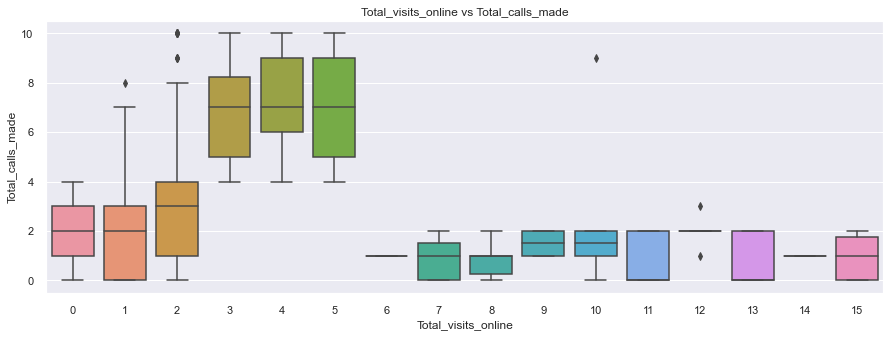

<IPython.core.display.Javascript object>

In [41]:
# Plot "Total_visits_online vs Total_calls_made" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_visits_online", y="Total_calls_made",  # palette="Set2",
).set(title="Total_visits_online vs Total_calls_made")
plt.show()

#### Observation  "Total_visits_online vs Total_calls_made": 

1. There seems to be three possible clusters.
2. Customers who make 6 or more online visits makes only 2 or less calls to bank. They are more online customers.
3. Customers who make online visits between 3 and 5 makes calls to bank more than 4 times. They are more call banking customers.
4. Customers who make 2 or less online visits makes only 4 or less calls to bank. They may be visiting banks directly for services.

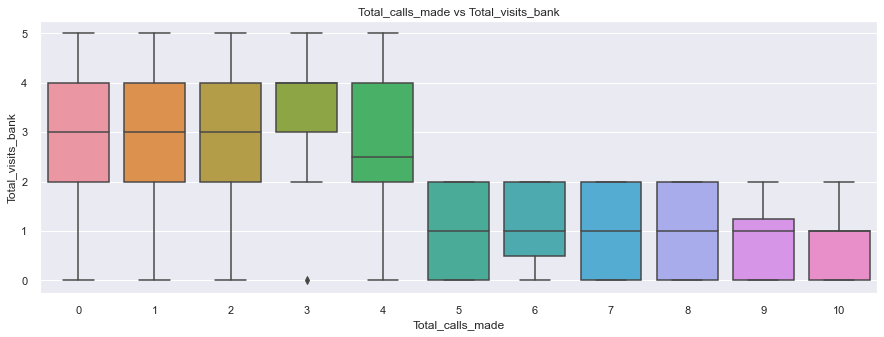

<IPython.core.display.Javascript object>

In [42]:
# Plot "Total_calls_made vs Total_visits_bank" comparison
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=alllife_data, x="Total_calls_made", y="Total_visits_bank",  # palette="Set2",
).set(title="Total_calls_made vs Total_visits_bank")
plt.show()

#### Observation  "Total_calls_made vs Total_visits_bank": 

1. There seems to be two possible clusters.
2. Customers who make 5 or more calls to bank goes directly to bank only 2 or less times. They are more oriented to making calls for services.
3. Customers who make 4 or less calls to bank goes directly to bank more than 2 times. They are more direct banking customers.

### 5. Insights based on EDA

#### Data Description:

1. There are 660 rows and 7 columns.
2. Row index is from 0 to 659. Total rows is 660
3. Column index is from 0 to 6. Total columns is 7
4. All columns are integer data type
5. Column "Sl_No" and "Customer Key" may be unique values
6. There are no null values in columns. However, they are integer data types, so must check for zeroes as well.
7. There is no target variable because this problem is for clustering which is unsupervised learning technique

#### Insights on each columns are listed below:

**1. Sl_No (Primary key of the records) :** This feature seems to be unique serial number.

**2. Customer Key (Customer Identification Number) :** This feature seems to be key customer identification number.

**3. Avg_Credit_Limit (Average credit limit of each customer for all credit cards) :** This is a numerical variable. Its values ranges from 3000 to 200000. Mean value is 34574 and median is 18000. There are lot of outliers and its distribution is heavily right skewed. But, these outliers looks like genuine cases and they could form a potential cluster. Unsupervised learning techniques are robust for outliers. So outlier treatment is not required. There are no missing values.

**4. Total_Credit_Cards (Total number of credit cards possessed by the customer) :** This is a numerical variable. Its values ranges from 1 to 10. Mean value is 4.7 and median is 5. There are no outliers and its distribution is not skewed. But, KDE shows there are two peaks which could mean atleast two clusters. There are no missing values and zeroes. **Most of customers has 4 Credit Cards (22.9%). Followed by 6 Credit Cards (17.7%) and 7 Credit Cards (15.3%)**

**5. Total_visits_bank (Total number of visits that customer made (yearly) personally to the bank) :** This is a numerical variable. Its values ranges from 0 to 15. Mean value is 2.6 and median is 2. There are no outliers and its distribution is not skewed. KDE shows only one peak. There are no missing values. Zero values could mean customer didnt visit bank even for one time. **Most of customers made 2 visits (23.9%). Followed by 1 visit (17.0%) and 0 visits (15.2%)**

**6. Total_visits_online (Total number of visits or online logins made by the customer (yearly)) :** This is a numerical variable. Its values ranges from 0 to 5. Mean value is 2.4 and median is 2. There are outliers and its distribution is right skewed. But, they looks like genuine values and could mean a potential cluster. KDE shows there are two peaks which could mean atleast two clusters. There are no missing values. ZZero values could mean customers havent visited bank online at all. **Most of customers has 2 visits online (28.6%). Followed by 0 visits online (21.8%) and 1 visits online (16.5%).** Usage of online services is very less by customers.

**7. Total_calls_made (Total number of calls made by the customer to the bank or its customer service department (yearly)) :** This is a numerical variable. Its values ranges from 0 to 10. Mean value is 3.5 and median is 3. There are no outliers and its distribution is not skewed. KDE shows there are two possible clusters. There are no missing values. Zero values could mean customer havent made any calls. **Most of customers has 4 calls made (16.4%). Followed by 0 calls made (14.7%) and 2 calls made (13.8%)**



#### Other Insights :

**1. Avg_Credit_Limit vs Sl_No :** There seems to be three distinct clusters for Average Credit Limit.

**2. Avg_Credit_Limit vs Total_Credit_Cards :** There is a positive correlation between Average Credit Limit and Total Credit Cards. Its obvious because total credit cards eventually increases credit limit as well. There seems to be two distinct clusters here. There is also a chance of three clusters where two clusters seems very close to each other. **Customers who have more than 7 credit cards seems to have average credit limit more than 75000.
Customers who have less than 4 credit cards seems to have average credit limit less than 25000.**

**3. Avg_Credit_Limit vs Total_visits_online :** There is a positive correlation between Average Credit Limit and Total Visits Online. Looks like customers who have higher Average Credit Limit prefers online transactions. May be they are more professional users and are well aware of online technology services. There seems to be two distinct clusters here. **Customers who did 6 and more online visits seems to have average credit limit mostly more than 100000. Customers who did less than 6 online visits seems to have average credit limit mostly less than 50000.**

**4. Avg_Credit_Limit vs Total_calls_made :** There is a negative correlation between Average Credit Limit and Total Calls Made. Looks like customers who have higher Average Credit Limit doesnt prefer calls. May be they mostly use online technology services. There seems to be two possible clusters here. **Customers who did calls 5 and more times seems to have average credit limit mostly less than 25000. Customers who did calls less than 5 seems to have average credit limit mostly more than 25000.**

**5. Total_Credit_Cards vs Total_visits_bank :** There seems to be three possible clusters here. Customers who have more Credit Cards doesnt visit banks much. May be they mostly use online technology services. **Customers who have 8 or more credit cards seems to make less than 1 visit to bank. Customers who have credit cards between 4 and 7 seems to make more than 2 visits to bank. Customers who have 3 and less credit cards seems to make less than 2 visits to bank.**

**6. Total_Credit_Cards vs Total_visits_online :** There seems to be two distinct clusters here. Customers who have more Credit Cards does more online transactions. **Customers who have 8 or more credit cards seems to use online services more than 6 times and are active online users. Customers who have credit cards 7 and less seems to use online services less than 6 times.**

**7. Total_Credit_Cards vs Total_calls_made :** There is a negative correlation here. Customers who have less Credit Cards makes more calls. There seems to be two possible clusters here. **Customers who have 5 and more credit cards seems to make calls less than 4 times. Customers who have 4 and less credit cards seems to make calls more than 4 times and are active users for call services.**

**8. Total_visits_online vs Total_visits_bank :** There is a negative correlation here. Customers who does very less online transactions is visiting banks directly. There seems to be two possible clusters.
**Customers who make 3 or more online visits goes directly to bank only 2 or less times. They are more online customers. Customers who make 2 or less online visits goes directly to bank more than 2 times. They are more direct banking customers.**

**9. Total_visits_online vs Total_calls_made :** Customers who does more online transactions doesnt make much calls. There seems to be three possible clusters.
**Customers who make 6 or more online visits makes only 2 or less calls to bank. They are more online customers.
Customers who make online visits between 3 and 5 makes calls to bank more than 4 times. They are more call banking customers. Customers who make 2 or less online visits makes only 4 or less calls to bank. They may be visiting banks directly for services.**

**10. Total_calls_made vs Total_visits_bank :** Customers who makes more calls doesnt visit bank directly much. There seems to be two possible clusters.
**Customers who make 5 or more calls to bank goes directly to bank only 2 or less times. They are more oriented to making calls for services. Customers who make 4 or less calls to bank goes directly to bank more than 2 times. They are more direct banking customers.**


#### Actions for Data Preprocessing:

1. There are no null values. Zeroes looks like genuine values. **Missing Value Treatment is not required.**
2. There are outliers. However, they looks genuine values. Also, Unsupervised learning is robust for outlier values. These outliers could mean a potential cluster. **Outlier Treatment is not required.** 
3. Feature values are in their own metrics and there is large difference between them. **So scaling is required for both K Means and Hierarchical clustering algorithms.**


### 6. Data Preprocessing

#### A. Feature engineering 

In [43]:
# Check data types
alllife_data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

<IPython.core.display.Javascript object>

In [44]:
# Check head of data
alllife_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

#### Observation : 
1. All values are numeric. So no need to type cast or do one hot encoding
2. There are zero values in numerical columns as noticed in EDA. However, they seems to be genuine values as customer may not have taken those services. So missing value treatment is not required.
3. Column Avg_Credit_Limit is having large values compared to other columns. So scaling is required. 
4. SL_No and Customer is not required for clustering. It can be kept in original dataframe itself and create a subset for scaling and clustering.

#### B. Missing value treatment 

In [45]:
# Check null values and its percentage

def check_null_values():
    return pd.DataFrame(
    {
        "Null values": alllife_data.isnull().sum(),
        "Percentage of Null values": round(
            (alllife_data.isnull().sum() / alllife_data.shape[0] * 100), 2
        ),
        "Data Type": alllife_data.dtypes,
    }
    )
    
    
check_null_values()


,Null values,Percentage of Null values,Data Type
Sl_No,0,0.0,int64
Customer Key,0,0.0,int64
Avg_Credit_Limit,0,0.0,int64
Total_Credit_Cards,0,0.0,int64
Total_visits_bank,0,0.0,int64
Total_visits_online,0,0.0,int64
Total_calls_made,0,0.0,int64


<IPython.core.display.Javascript object>

#### Observation : 
1. There are no null values
2. There were zero values in numerical columns as noticed in EDA. However, they seems to be genuine values as customer may not have taken those services.

#### C. Outlier treatment 

In [46]:
# Create function to detect outliers


def detect_outliers_iqr(data):
    """
    To deteck outliers

    data: dataframe
    """

    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("1st Quantile : ", q1, " 3rd Quantile : ", q3, "\n")
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    print("Lower Whisker : ", lwr_bound, " Upper Whisker : ", upr_bound, "\n")
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

<IPython.core.display.Javascript object>

In [47]:
numerical_col = alllife_data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Sl_No',
 'Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

In [48]:
# Check outlier values whether its genuine or data error
for colname in numerical_col[2:7]:
    print("Column : ", colname, "\n")
    sample_outliers = detect_outliers_iqr(alllife_data[colname])
    print("Outliers from IQR method: ", sample_outliers)
    print("*" * 70)
    print("\n\n")

Column :  Avg_Credit_Limit 

1st Quantile :  10000.0  3rd Quantile :  48000.0 

Lower Whisker :  -47000.0  Upper Whisker :  105000.0 

Outliers from IQR method:  [106000, 108000, 111000, 112000, 114000, 121000, 123000, 126000, 127000, 131000, 132000, 136000, 144000, 145000, 146000, 153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]
**********************************************************************



Column :  Total_Credit_Cards 

1st Quantile :  3.0  3rd Quantile :  6.0 

Lower Whisker :  -1.5  Upper Whisker :  10.5 

Outliers from IQR method:  []
**********************************************************************



Column :  Total_visits_bank 

1st Quantile :  1.0  3rd Quantile :  4.0 

Lower Whisker :  -3.5  Upper Whisker :  8.5 

Outliers from IQR method:  []
**********************************************************************



Col

<IPython.core.display.Javascript object>

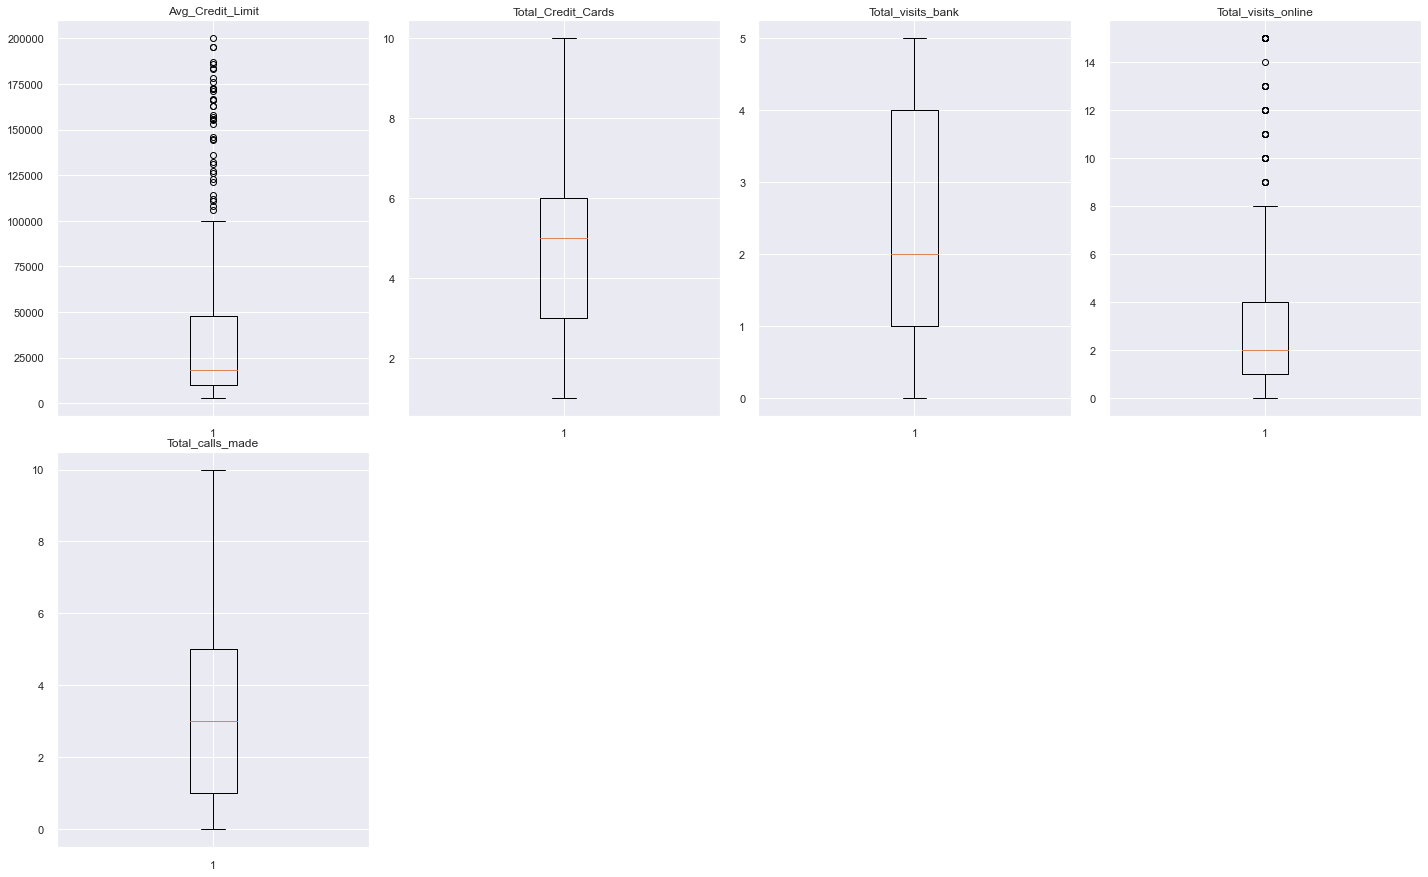

<IPython.core.display.Javascript object>

In [49]:
# Check outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col[2:7]):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(alllife_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation : 
1. There are outlier values. However, they looks like genuine values of customers.
2. All outlier values appears to be very close to each other. There are no values which are standing out far.
3. Outlier will not cause a problem for clustering. In fact, they can provide valuation information for clustering.
4. So outlier treatment is not required

#### D. Duplicate Observations Check

In [50]:
# Checking duplicates for all features
alllife_data[alllife_data.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


<IPython.core.display.Javascript object>

In [51]:
# Checking duplicates for all features except "Sl_No" and "Customer Key"
alllife_data[alllife_data.iloc[:, 2:].duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,163,80457,8000,2,0,3,4
175,176,20524,6000,1,0,2,5
215,216,18609,8000,4,0,4,7
295,296,41380,10000,6,4,2,3
324,325,49844,9000,4,5,0,4
361,362,89635,18000,6,3,1,4
378,379,11398,12000,6,5,2,1
385,386,16418,8000,7,4,2,0
395,396,31515,5000,4,5,0,1
455,456,89446,47000,6,2,0,4


<IPython.core.display.Javascript object>

In [52]:
# Checking duplicates for feature "Customer Key" alone
alllife_data[alllife_data.iloc[:, 1:2].duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

#### Observation : 
1. There are no duplicate values for all features together
2. There are duplicate values for all features except "Customer Key". But, they could be genuine data of other customers. 
3. There are duplicate values for feature "Customer Key" alone. But, these duplicate values might correspond to customer profile changes, and as such, there is no need to delete these records as these are actual occurrences at some point in the time.

#### E. Scaling Data

In [53]:
# Check data for scaling
alllife_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [54]:
# Scaling the data set before clustering
scaler = StandardScaler()
alllife_data_subset = alllife_data.iloc[:, 2:7].copy()
alllife_data_subset_scaled = scaler.fit_transform(alllife_data_subset)

<IPython.core.display.Javascript object>

In [55]:
# Creating a dataframe from the scaled data
alllife_data_subset_scaled_df = pd.DataFrame(
    alllife_data_subset_scaled, columns=alllife_data_subset.columns
)

<IPython.core.display.Javascript object>

In [56]:
# Check scaled data
alllife_data_subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

### 7. Applying K-means Clustering

#### A. Plot the Elbow curve

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168


<function matplotlib.pyplot.show(close=None, block=None)>

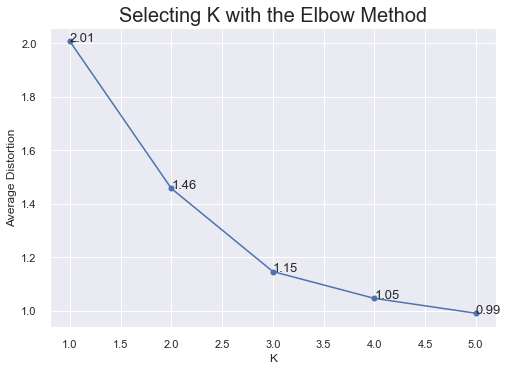

<IPython.core.display.Javascript object>

In [57]:
# Plot elbow curve to find appropriate number of clusters (K)
clusters = range(1, 6)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(alllife_data_subset_scaled_df)
    prediction = model.predict(alllife_data_subset_scaled_df)
    distortion = (
        sum(
            np.min(
                cdist(
                    alllife_data_subset_scaled_df, model.cluster_centers_, "euclidean"
                ),
                axis=1,
            )
        )
        / alllife_data_subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-", marker="o", color="b")
for a, b in zip(clusters, meanDistortions):
    plt.text(a, b, str(round(b, 2)), size=13)
plt.xlabel("K")
plt.ylabel("Average Distortion")
plt.title("Selecting K with the Elbow Method", fontsize=20)
plt.show

#### Observation : 
1. Appropriate number of clusters is 3 from above Elbow Method

#### B. Check Silhouette Scores 

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.25602552465167167


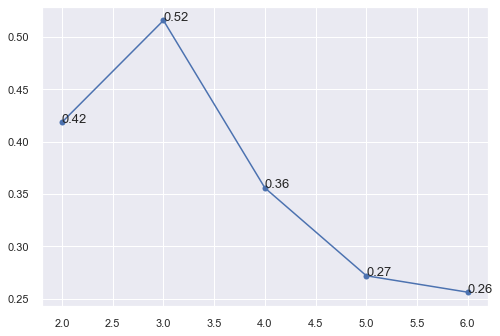

<IPython.core.display.Javascript object>

In [58]:
# Calculate Silhoutte score for all possible clusters
sil_score = []
cluster_list = list(range(2, 7))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((alllife_data_subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(alllife_data_subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score, marker="o", color="b")
for a, b in zip(cluster_list, sil_score):
    plt.text(a, b, str(round(b, 2)), size=13)

#### Observation : 
1. Silhouette score is maximum at 0.54 for 3 clusters.

#### C. Visualize Silhouette Score for 3 Clusters 

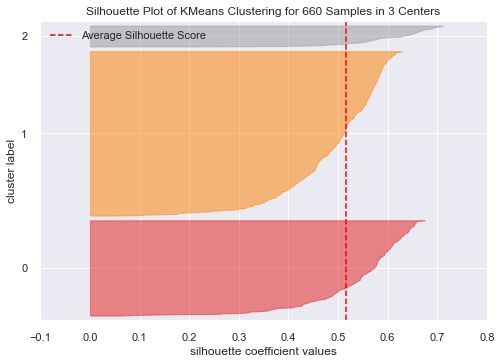

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [59]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(alllife_data_subset_scaled_df)
visualizer.show()

#### Observation : 
1. Silhouette visualizer looks distinct for 3 clusters.

#### D. Apply K Means Clustering for 3 Clusters 

In [60]:
%%time
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(alllife_data_subset_scaled_df)

CPU times: user 157 ms, sys: 20.9 ms, total: 178 ms
Wall time: 19.4 ms


KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

#### Observation : 
1. K Means technique is applied on scaled subset data for 3 clusters.
2. Total time taken is 178 ms

#### E. K Means Cluster Profiling

In [61]:
# adding kmeans cluster labels to the original dataframe
alllife_data["K_Means_Clusters"] = kmeans.labels_
alllife_data_subset["K_Means_Clusters"] = kmeans.labels_
alllife_data_subset_scaled_df["K_Means_Clusters"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [62]:
# group K Means Clusters to get aggregate values for each clusters
alllife_data_subset.groupby("K_Means_Clusters").agg(
    ["count", "min", "max", "mean", "median"]
)

Avg_Credit_Limit                                          \
                            count    min     max           mean    median   
K_Means_Clusters                                                            
0                             224   3000   50000   12174.107143   12000.0   
1                             386   5000  100000   33782.383420   31000.0   
2                              50  84000  200000  141040.000000  145500.0   

                 Total_Credit_Cards                           \
                              count min max      mean median   
K_Means_Clusters                                               
0                               224   1   4  2.410714    2.0   
1                               386   2   7  5.515544    6.0   
2                                50   5  10  8.740000    9.0   

                 Total_visits_bank                           \
                             count min max      mean median   
K_Means_Clusters                                              
0                              224   0   2  0.933036    1.0   
1                              386   1   5  3.489637    3.0   
2                               50   0   1  0.600000    1.0   

                 Total_visits_online                            \
                               count min max       mean median   
K_Means_Clusters                                                 
0                                224   1  10   3.553571    4.0   
1                                386   0   3   0.981865    1.0   
2                                 50   6  15  10.900000   11.0   

                 Total_calls_made                           
                            count min max      mean median  
K_Means_Clusters                                            
0                             224   1  10  6.870536    7.0  
1                             386   0   4  2.000000    2.0  
2                              50   0   3  1.080000    1.0

<IPython.core.display.Javascript object>

In [63]:
# Create K means cluster profile
K_Means_cluster_profile = alllife_data_subset.groupby("K_Means_Clusters").mean()

<IPython.core.display.Javascript object>

In [64]:
# Calculate count of each clusters
K_Means_cluster_profile["Count_Each_K_Means_Clusters"] = (
    alllife_data_subset.groupby("K_Means_Clusters")["K_Means_Clusters"].count().values
)

<IPython.core.display.Javascript object>

In [65]:
# let's display cluster profiles
K_Means_cluster_profile.style.highlight_max(color="lightgreen", axis=0)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_Each_K_Means_Clusters
K_Means_Clusters,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

#### Observation : 
1. 3 Clusters has been formed.
2. Cluster 0 consists of 224 customers who contacts Bank mainly through calls. Their credit limit and credit card numbers are also low.
3. Cluster 1 consists of 386 customers who contacts Bank mainly directly. Their credit limit and credit card numbers are also low.
4. Cluster 2 consists of 50 customers who contacts Bank mainly through online. Their credit limit and credit card numbers are also high.

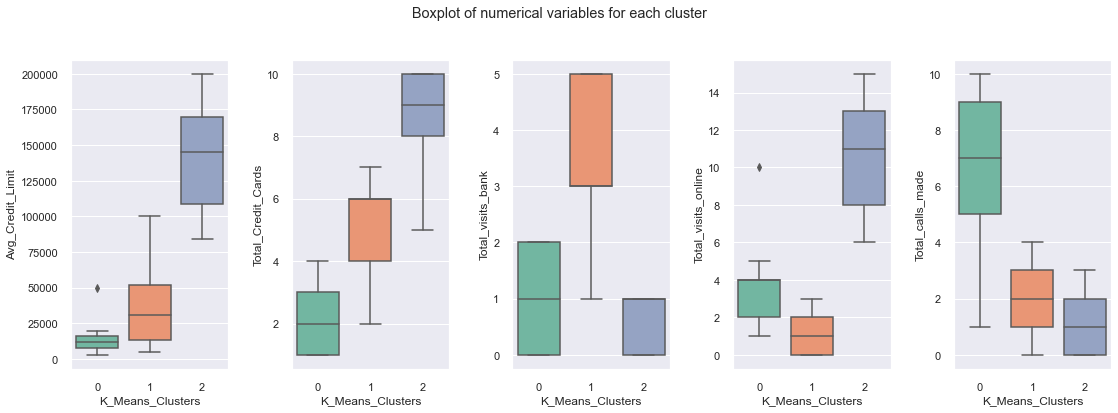

<IPython.core.display.Javascript object>

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for column in alllife_data.iloc[:, 2:7].columns:
    sns.boxplot(
        ax=axes[counter],
        y=alllife_data[column],
        x=alllife_data["K_Means_Clusters"],
        palette="Set2",
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

#### Observation : 
1. There is a clear distinction between 3 clusters.
2. Cluster 0 mostly have customers who make calls to bank.
3. Cluster 1 mostly have customers who visits bank directly.
4. Cluster 2 mostly have customers who does online transactions.

<AxesSubplot:xlabel='K_Means_Clusters'>

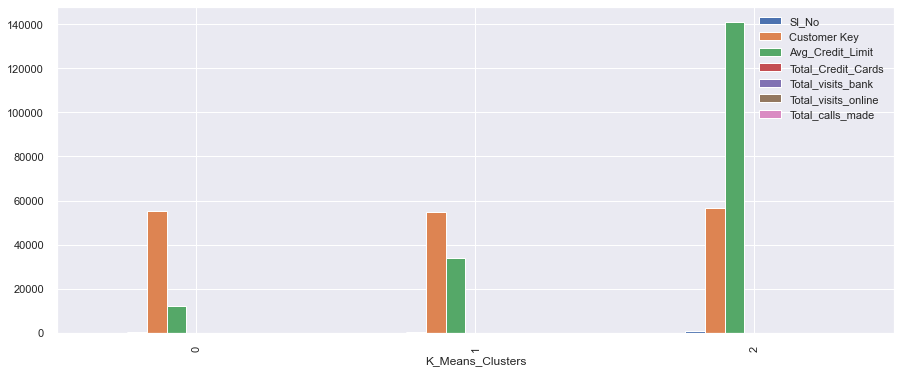

<IPython.core.display.Javascript object>

In [67]:
alllife_data.groupby("K_Means_Clusters").mean().plot.bar(figsize=(15, 6))


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x432 with 0 Axes>

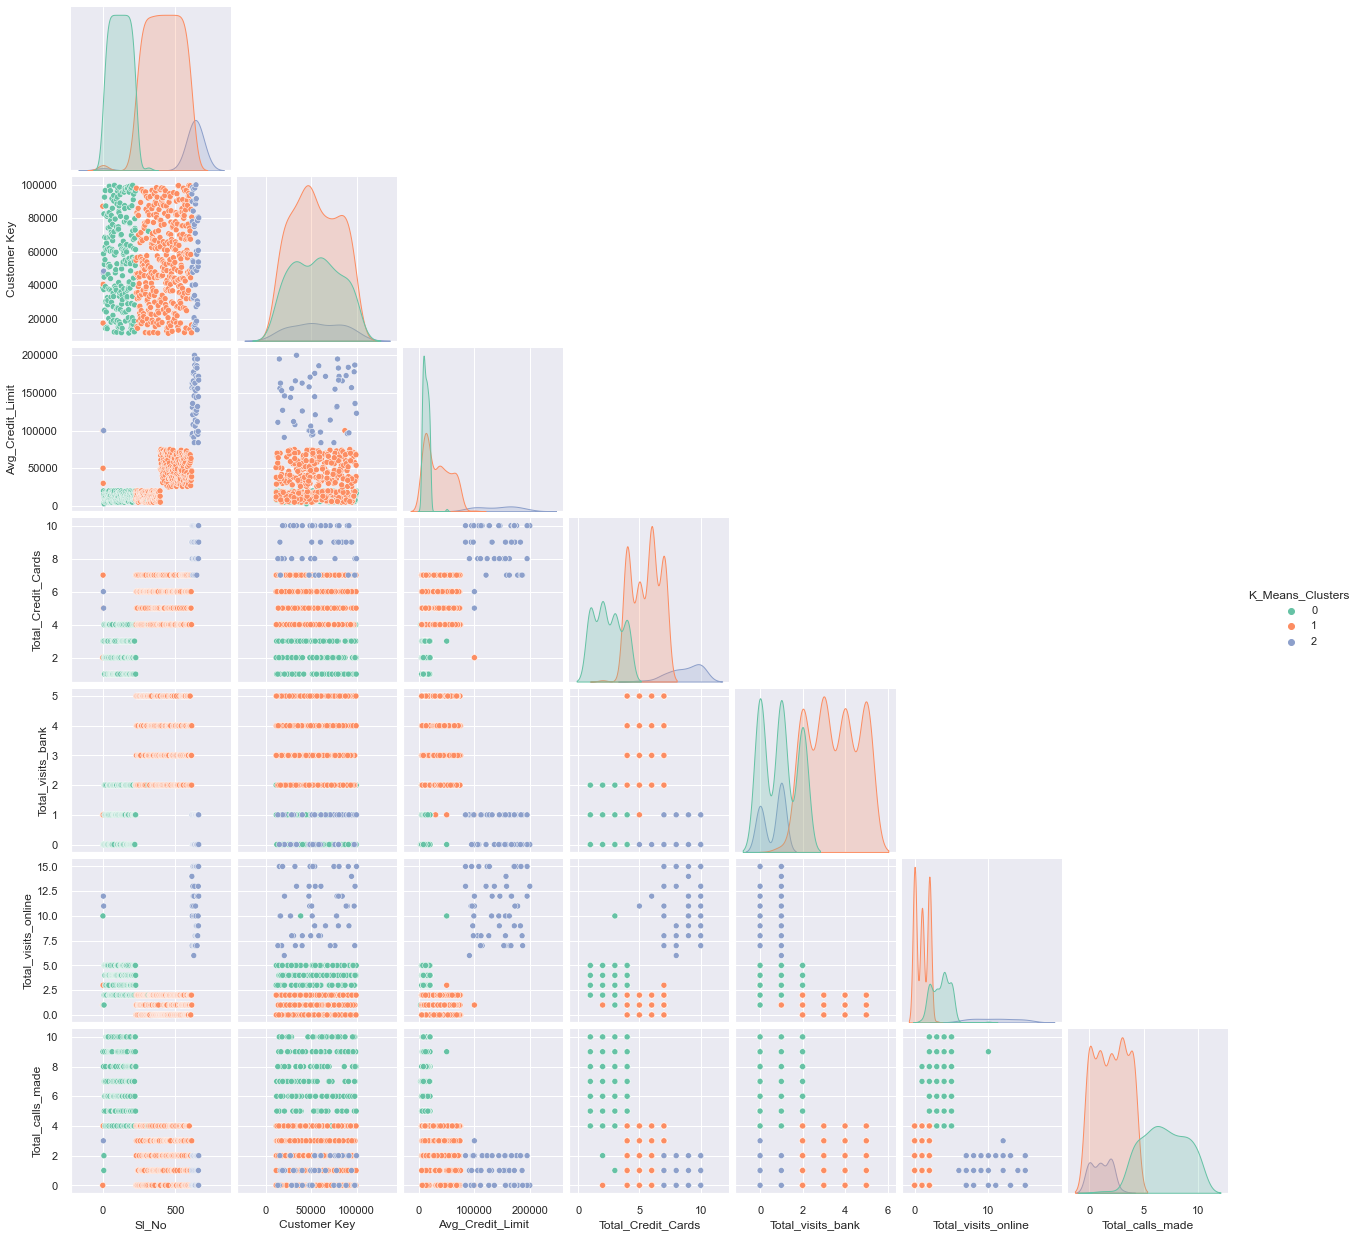

<IPython.core.display.Javascript object>

In [68]:
# Compare each numerical continous feature against each other
plt.figure(figsize=(20, 6))
sns.pairplot(
    alllife_data, palette="Set2", diag_kind="kde", corner=True, hue="K_Means_Clusters",
)
plt.show

#### Observation : 
1. There is a clear distinction between 3 clusters.
2. Cluster 0 mostly have customers who make calls to bank.
3. Cluster 1 mostly have customers who visits bank directly.
4. Cluster 2 mostly have customers who does online transactions.

### 8. Applying Hierarchical Clustering

#### A. Check cophenetic correlation for each linkage method

In [69]:
%%time 
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "ward", "centroid"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        if not (dm !="euclidean" and lm in ["ward","centroid"]):
            Z = linkage(alllife_data_subset_scaled_df.iloc[:, :5], metric=dm, method=lm)
            c, coph_dists = cophenet(Z, pdist(alllife_data_subset_scaled_df))
            print(
                "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                    dm.capitalize(), lm, c
                )
            )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.736131645704234.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8719215108154919.
Cophenetic correlation for Euclidean distance and average linkage is 0.9098665950741727.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8965516844385757.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7650213135881939.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.907657811103712.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7354583788182629.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.860191893471168.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9091300046589207.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9033531644350904.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7021453239452858.
Cophenetic correlation 

<IPython.core.display.Javascript object>

In [70]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9098665950741727, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

#### Observation : 
1. Highest cophenetic correlation is 0.9166598978943011, which is obtained with Euclidean distance and average linkage

#### B. Plot dendrograms for each linkage method

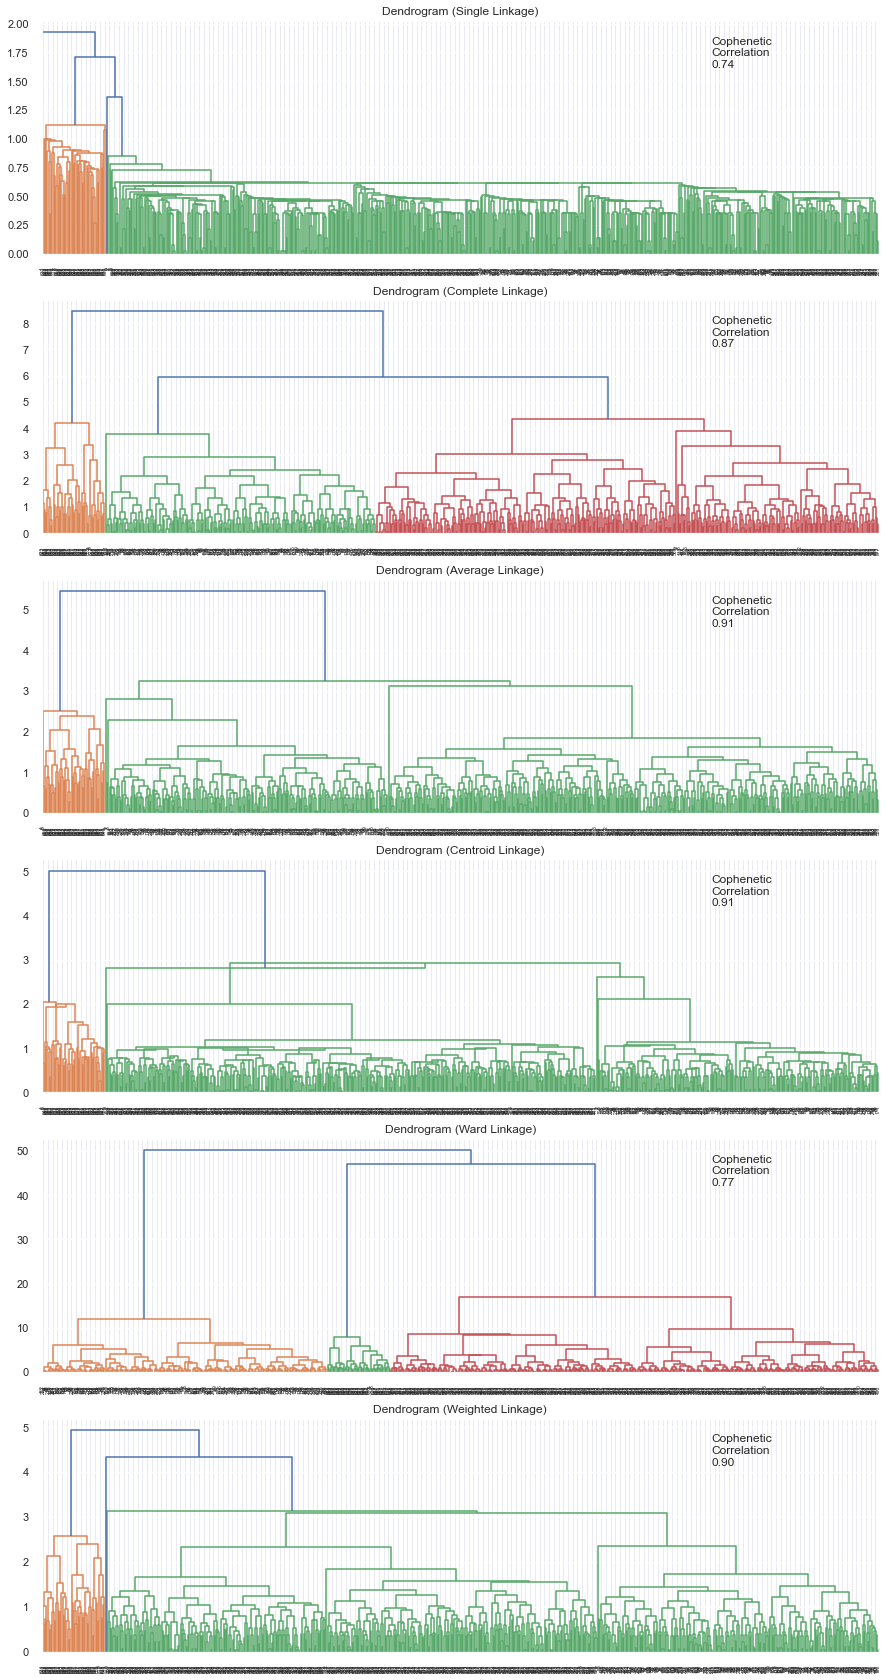

<IPython.core.display.Javascript object>

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(
        alllife_data_subset_scaled_df.iloc[:, :5], metric="euclidean", method=method
    )

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(alllife_data_subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observation : 
1. Highest cophenetic correlation is 0.92 for dendrogram obtained with Euclidean distance and Average linkage. This dendrogram shows 2 clusters based on distinct dendrogram height.
2. Second highest cophenetic correlation is 0.91 for dendrogram obtained with Euclidean distance and Centroid linkage. This dendrogram shows 2 clusters based on distinct dendrogram height.
3. Third highest cophenetic correlation is 0.90 for dendrogram obtained with Euclidean distance and Weighted linkage. This dendrogram shows 3 clusters based on dendrogram height.


#### C. Calculate Silhoutte Score

For n_clusters = 2, silhouette score is 0.5703183487340514
For n_clusters = 3, silhouette score is 0.515922432650965
For n_clusters = 4, silhouette score is 0.47495143595793504
For n_clusters = 5, silhouette score is 0.44039753024783956
For n_clusters = 6, silhouette score is 0.4153547954831452


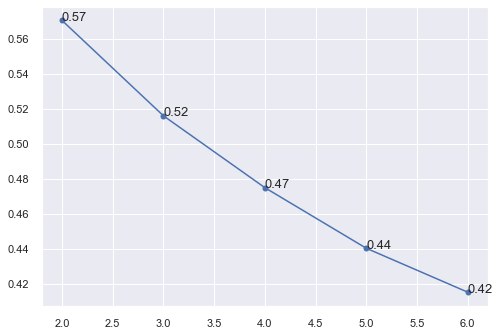

<IPython.core.display.Javascript object>

In [72]:
sil_score = []
cluster_list = list(range(2, 7))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, affinity="euclidean", linkage="average"
    )
    preds = clusterer.fit_predict((alllife_data_subset_scaled_df.iloc[:, :5]))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(alllife_data_subset_scaled_df.iloc[:, :5], preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score, marker="o", color="b")
for a, b in zip(cluster_list, sil_score):
    plt.text(a, b, str(round(b, 2)), size=13)

#### Observation : 
1. Silhouette score is maximum at 0.57 for 2 clusters.
2. Appropriate number of clusters is 2 based on height of dendrogram and Silhoutte score.


#### D. Apply Hierarchical clustering

In [73]:
%%time 
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(alllife_data_subset_scaled_df.iloc[:, :5])

CPU times: user 45.7 ms, sys: 1.45 ms, total: 47.1 ms
Wall time: 7.66 ms


AgglomerativeClustering(linkage='average')

<IPython.core.display.Javascript object>

#### Observation : 
1. Hierarchical technique is applied on scaled subset data for 2 clusters.
2. Total time taken is 47.1 ms

#### E. Hierarchical Cluster Profiling

In [74]:
alllife_data_subset_scaled_df["HC_Clusters"] = HCmodel.labels_
alllife_data_subset["HC_Clusters"] = HCmodel.labels_
alllife_data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [75]:
alllife_data_subset.groupby("HC_Clusters").agg(
    ["count", "min", "max", "mean", "median"]
)

Avg_Credit_Limit                                          \
                       count    min     max           mean    median   
HC_Clusters                                                            
0                        610   3000  100000   25847.540984   17000.0   
1                         50  84000  200000  141040.000000  145500.0   

            Total_Credit_Cards                         Total_visits_bank      \
                         count min max     mean median             count min   
HC_Clusters                                                                    
0                          610   1   7  4.37541    4.0               610   0   
1                           50   5  10  8.74000    9.0                50   0   

                                Total_visits_online                           \
            max     mean median               count min max      mean median   
HC_Clusters                                                                    
0             5  2.55082    2.0                 610   0  10   1.92623    2.0   
1             1  0.60000    1.0                  50   6  15  10.90000   11.0   

            Total_calls_made                          K_Means_Clusters      \
                       count min max      mean median            count min   
HC_Clusters                                                                  
0                        610   0  10  3.788525    3.0              610   0   
1                         50   0   3  1.080000    1.0               50   2   

                                  
            max      mean median  
HC_Clusters                       
0             1  0.632787    1.0  
1             2  2.000000    2.0

<IPython.core.display.Javascript object>

In [76]:
cluster_profile_HC = alllife_data_subset.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [77]:
cluster_profile_HC["Count_Each_HC_Clusters"] = (
    alllife_data_subset.drop("K_Means_Clusters", axis=1)
    .groupby("HC_Clusters")["HC_Clusters"]
    .count()
    .values
)

<IPython.core.display.Javascript object>

In [78]:
# let's display cluster profiles
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_Means_Clusters,Count_Each_HC_Clusters
HC_Clusters,,,,,,,
0,25847.540984,4.375410,2.550820,1.926230,3.788525,0.632787,610
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50


<IPython.core.display.Javascript object>

#### Observation : 
1. 2 Clusters has been formed.
2. Cluster 0 consists of 610 customers who contacts Bank mainly through direct visits and calls. Their credit limit and credit card numbers are also low.
3. Cluster 1 consists of 50 customers who does more online visits. Their credit limit and credit card numbers are very high.

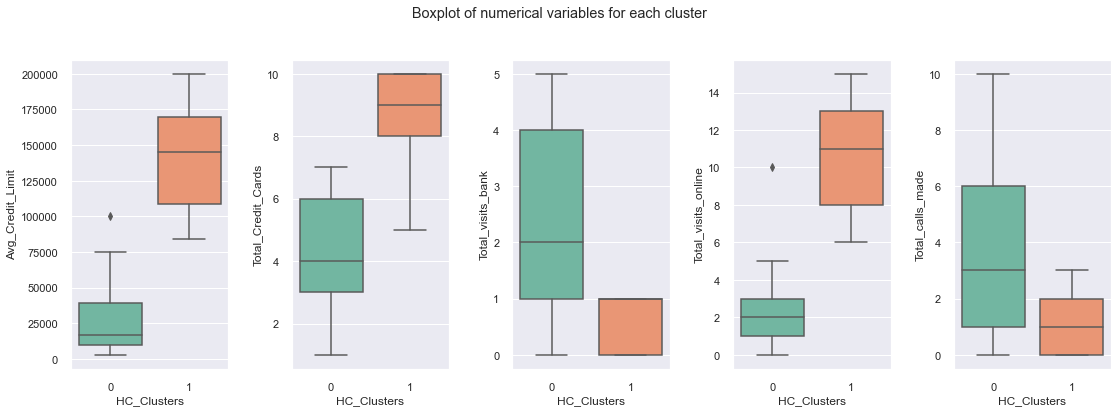

<IPython.core.display.Javascript object>

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for column in alllife_data.iloc[:, 2:7].columns:
    sns.boxplot(
        ax=axes[counter],
        y=alllife_data[column],
        x=alllife_data["HC_Clusters"],
        palette="Set2",
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

#### Observation : 
1. 2 Clusters has been formed.
2. Cluster 0 consists of 610 customers who contacts Bank mainly through direct visits and calls. Their credit limit and credit card numbers are also low.
3. Cluster 1 consists of 50 customers who does more online visits. Their credit limit and credit card numbers are very high.

<AxesSubplot:xlabel='HC_Clusters'>

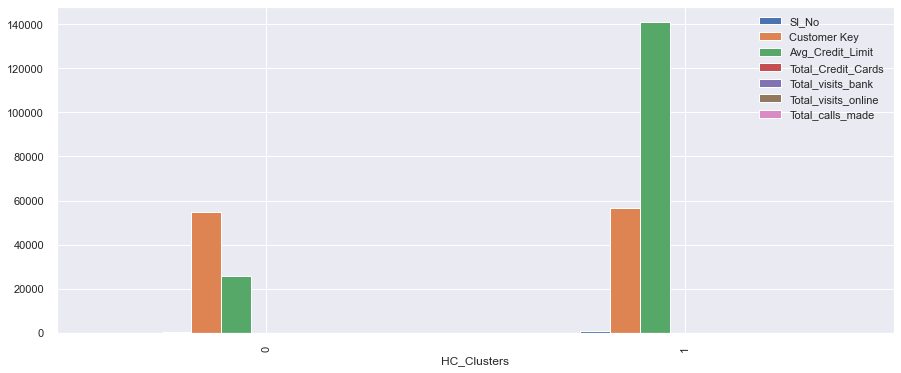

<IPython.core.display.Javascript object>

In [80]:
alllife_data.drop("K_Means_Clusters", axis=1).groupby("HC_Clusters").mean().plot.bar(
    figsize=(15, 6)
)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x432 with 0 Axes>

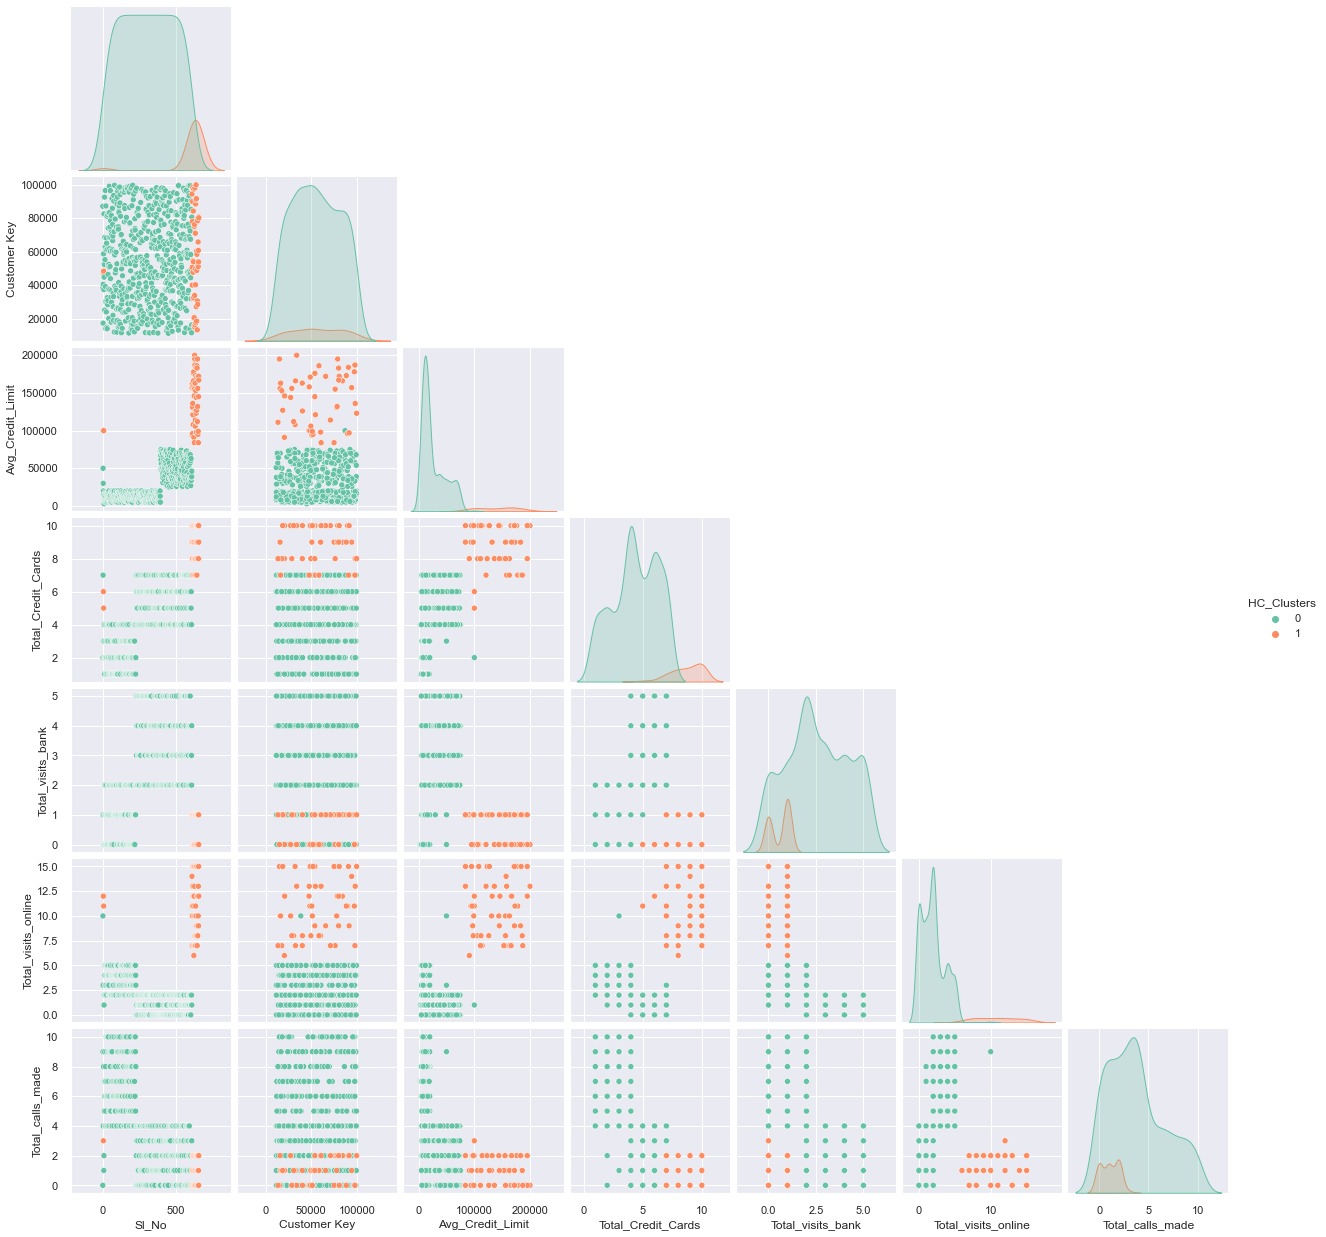

<IPython.core.display.Javascript object>

In [81]:
# Compare each numerical continous feature against each other
plt.figure(figsize=(20, 6))
sns.pairplot(
    alllife_data.drop("K_Means_Clusters", axis=1),
    palette="Set2",
    diag_kind="kde",
    corner=True,
    hue="HC_Clusters",
)
plt.show

### 9. K-means vs Hierarchical Clustering

In [82]:
alllife_data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'K_Means_Clusters', 'HC_Clusters'],
      dtype='object')

<IPython.core.display.Javascript object>

In [83]:
alllife_data_subset.groupby(["K_Means_Clusters", "HC_Clusters"]).agg(
    ["count", "min", "max"]
)

Avg_Credit_Limit                 \
                                        count    min     max   
K_Means_Clusters HC_Clusters                                   
0                0                        224   3000   50000   
1                0                        386   5000  100000   
2                1                         50  84000  200000   

                             Total_Credit_Cards         Total_visits_bank      \
                                          count min max             count min   
K_Means_Clusters HC_Clusters                                                    
0                0                          224   1   4               224   0   
1                0                          386   2   7               386   1   
2                1                           50   5  10                50   0   

                                 Total_visits_online         Total_calls_made  \
                             max               count min max            count   
K_Means_Clusters HC_Clusters                                                    
0                0             2                 224   1  10              224   
1                0             5                 386   0   3              386   
2                1             1                  50   6  15               50   

                                      
                             min max  
K_Means_Clusters HC_Clusters          
0                0             1  10  
1                0             0   4  
2                1             0   3

<IPython.core.display.Javascript object>

#### Observation : 
* Clusters 0 and 1 of K Means clustering is same as Cluster 0 of Hierarchical clustering. Also, Cluster 2 of K Means clustering is same as Cluster 1 of Hierarchical clustering.

In [84]:
alllife_data_subset.groupby("K_Means_Clusters").agg(["count", "min", "max"])

Avg_Credit_Limit                Total_Credit_Cards          \
                            count    min     max              count min max   
K_Means_Clusters                                                              
0                             224   3000   50000                224   1   4   
1                             386   5000  100000                386   2   7   
2                              50  84000  200000                 50   5  10   

                 Total_visits_bank         Total_visits_online          \
                             count min max               count min max   
K_Means_Clusters                                                         
0                              224   0   2                 224   1  10   
1                              386   1   5                 386   0   3   
2                               50   0   1                  50   6  15   

                 Total_calls_made         HC_Clusters          
                            count min max       count min max  
K_Means_Clusters                                               
0                             224   1  10         224   0   0  
1                             386   0   4         386   0   0  
2                              50   0   3          50   1   1

<IPython.core.display.Javascript object>

In [85]:
alllife_data_subset.groupby("HC_Clusters").agg(["count", "min", "max"])

Avg_Credit_Limit                Total_Credit_Cards          \
                       count    min     max              count min max   
HC_Clusters                                                              
0                        610   3000  100000                610   1   7   
1                         50  84000  200000                 50   5  10   

            Total_visits_bank         Total_visits_online          \
                        count min max               count min max   
HC_Clusters                                                         
0                         610   0   5                 610   0  10   
1                          50   0   1                  50   6  15   

            Total_calls_made         K_Means_Clusters          
                       count min max            count min max  
HC_Clusters                                                    
0                        610   0  10              610   0   1  
1                         50   0   3               50   2   2

<IPython.core.display.Javascript object>

In [86]:
# function to plot histogram for comparison of K Means and Hierarchical clustering.


def histplot_comparison(column, figsize=(12, 7), kde=False, bins=None):
    """
    Histogram comparison between two clusters

    data: dataframe
    column: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_hist1, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.5, 0.5)},
        figsize=figsize,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.histplot(
        data=alllife_data, x=column, kde=kde, ax=ax_hist1, bins=bins, color="cornflowerblue",hue='K_Means_Clusters',palette='Set2'
    ).set(title='K Means Clustering') if bins else sns.histplot(
        data=alllife_data, x=column, kde=kde, ax=ax_hist1, color="cornflowerblue",hue='K_Means_Clusters',palette='Set2'
    ).set(title='K Means Clustering')
    sns.histplot(
        data=alllife_data, x=column, kde=kde, ax=ax_hist2, bins=bins, color="cornflowerblue",hue='HC_Clusters',palette='Set2'
    ).set(title='Hierarchical Clustering') if bins else sns.histplot(
        data=alllife_data, x=column, kde=kde, ax=ax_hist2, color="cornflowerblue",hue='HC_Clusters',palette='Set2'
    ).set(title='Hierarchical Clustering')
    plt.show()


<IPython.core.display.Javascript object>

#### A. Avg_Credit_Limit

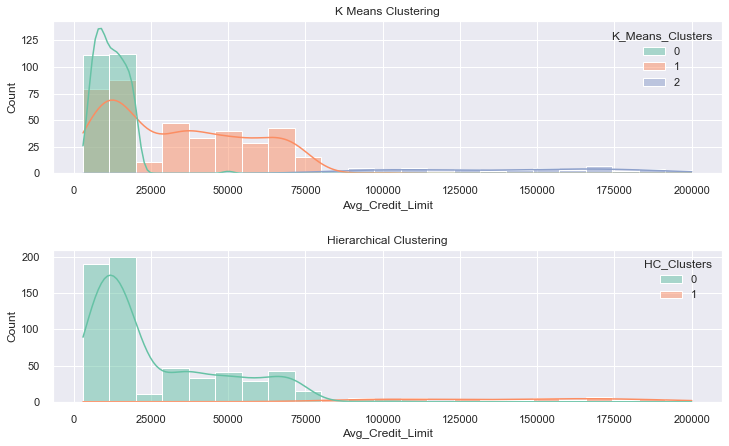

<IPython.core.display.Javascript object>

In [87]:
# Visualize data through plot
histplot_comparison("Avg_Credit_Limit", kde=True)

#### Observation : 
1. K Means clustering shows three distinct clusters. Customers with very low credit limit, medium credit limit and very high credit limit.
2. Hierarchical clustering only shows two clusters which doesnt distinguish customers between low and medium credit limit.
3. Looks like Cluster 0 in Hierarchical clustering is same as Cluster 0 and 1  in K Means clustering.  

#### B. Total_Credit_Cards

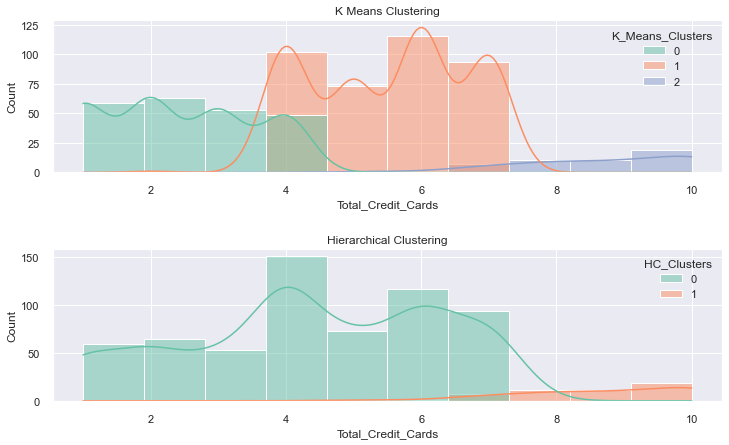

<IPython.core.display.Javascript object>

In [88]:
# Visualize data through plot
histplot_comparison("Total_Credit_Cards", kde=True, bins=10)

#### Observation : 
1. K Means clustering shows three distinct clusters. Customers with very less number of credit cards, moderate credit cards and very high number of credit cards.
2. Hierarchical clustering only shows two clusters which doesnt distinguish customers between less, moderate and high number of credit cards.
3. Looks like Cluster 0 in Hierarchical clustering is same as Cluster 0 and 1  in K Means clustering.  

#### C. Total_visits_bank

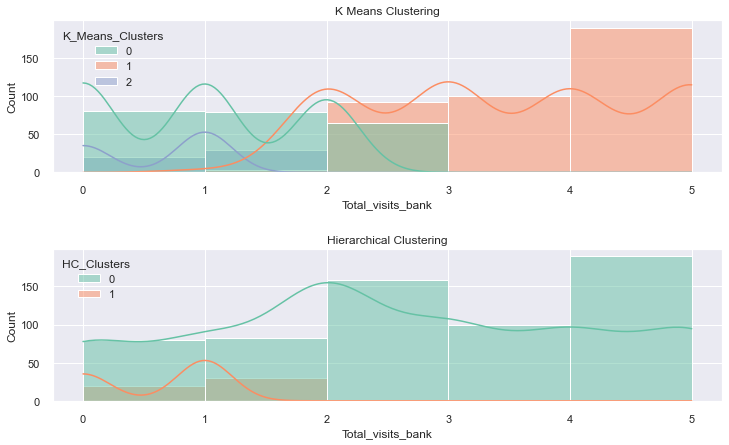

<IPython.core.display.Javascript object>

In [89]:
# Visualize data through plot
histplot_comparison("Total_visits_bank", kde=True, bins=5)

#### Observation : 
1. K Means clustering shows three distinct clusters. Customers who visits bank more are separated out clearly. Cluster 0 is more prominent here.
2. Hierarchical clustering only shows two clusters which doesnt clearly separates customers who visits bank more often.
3. Looks like Cluster 0 in Hierarchical clustering is same as Cluster 0 and 1  in K Means clustering.  

#### D. Total_visits_online

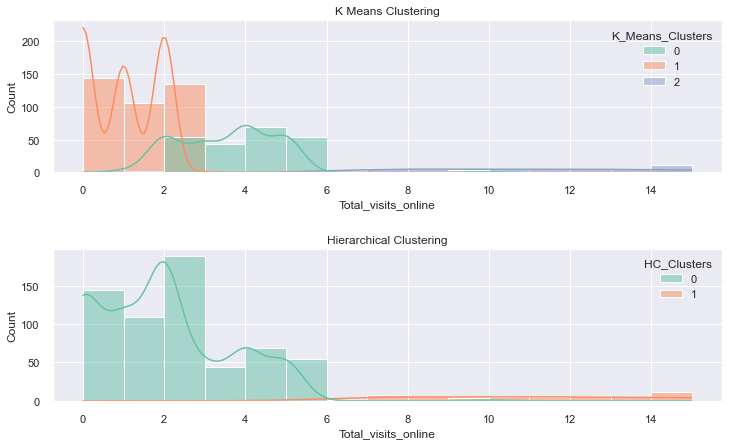

<IPython.core.display.Javascript object>

In [90]:
# Visualize data through plot
histplot_comparison("Total_visits_online", kde=True, bins=15)

#### Observation : 
1. K Means clustering shows three distinct clusters. Customers who uses online banking more, moderate and less. Cluster 2 is more prominent here.
2. Hierarchical clustering only shows two clusters which doesnt clearly separates customers using online banking moderately and very less
3. Looks like Cluster 0 in Hierarchical clustering is same as Cluster 0 and 1  in K Means clustering.  

#### E. Total_calls_made

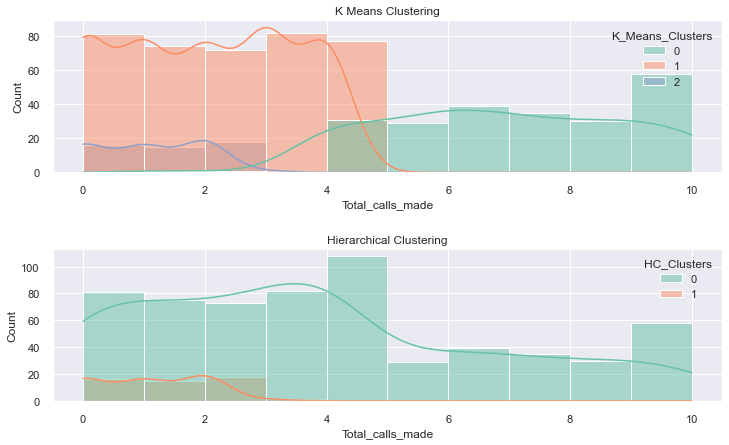

<IPython.core.display.Javascript object>

In [91]:
# Visualize data through plot
histplot_comparison("Total_calls_made", kde=True, bins=10)

#### Observation : 
1. K Means clustering shows three distinct clusters. Customers who makes calls more, moderate and less. Cluster 1 is more prominent here.
2. Hierarchical clustering only shows two clusters which doesnt clearly separates customers making calls moderately and very less
3. Looks like Cluster 0 in Hierarchical clustering is same as Cluster 0 and 1  in K Means clustering.

### K-means vs Hierarchical Clustering Comparison

**K Means Clustering:**

* Time taken for execution - 178 ms.

* Identified 3 clusters based on best Silhoutte score and Elbow Method. Clearly distinguished 3 segments of customers - online banking, call bank and visit bank. 

* Best Silhoutte Score - 0.54.

* Cluster 0 has 224 customers (calling users and low credit card users). Cluster 1 has 386 customers (visiting users and moderate credit card users). Cluster 2 has 50 customers (online users and high credit card users).

* Median Values :
    * **Cluster 0 -** Avg_Credit_Limit (12000.0), Total_Credit_Cards (2), Total_visits_bank (1), Total_visits_online (4), Total_calls_made (7)
    * **Cluster 1 -** Avg_Credit_Limit (31000.0), Total_Credit_Cards (6), Total_visits_bank (3), Total_visits_online (1), Total_calls_made (2)
    * **Cluster 2 -** Avg_Credit_Limit (145500.0), Total_Credit_Cards (9), Total_visits_bank (1), Total_visits_online (11), Total_calls_made (1)


**Hierarchical Clustering :**

* Time taken for execution - 47.1 ms. 
* Identified only 2 clusters based on best Silhoutte score and Dendrogram. Distinguished only 2 segments of customers - online banking and others.
* Best Silhoutte Score - 0.57.
* Cluster 0 has 610 customers (calling and visiting users). Cluster 1 has 50 customers (online and high credit card users).
* Median Values :
    * **Cluster 0 -** Avg_Credit_Limit (17000.0), Total_Credit_Cards (4), Total_visits_bank (2), Total_visits_online (2), Total_calls_made (3)
    * **Cluster 1 -** Avg_Credit_Limit (145500.0), Total_Credit_Cards (9), Total_visits_bank (1), Total_visits_online (11), Total_calls_made (1)

### K-means vs Hierarchical Clustering Similarity
    
* Clusters 0 and 1 of K Means clustering is same as Cluster 0 of Hierarchical clustering. Also, Cluster 2 of K Means clustering is same as Cluster 1 of Hierarchical clustering.

### 10. Dimensionality Reduction using PCA for Visualization

In [92]:
# Instantiate PCA object for 5 components which is number of features
pca = PCA(n_components=5)
pca.fit(alllife_data_subset_scaled_df.iloc[:, 0:5])

PCA(n_components=5)

<IPython.core.display.Javascript object>

In [93]:
# Print Eigen values
print(pca.explained_variance_)

[2.29029906 1.87416377 0.3205531  0.27826563 0.24430569]


<IPython.core.display.Javascript object>

In [94]:
# Print eigen vectors
print(pca.components_)

[[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]
 [ 0.00346147 -0.28498293 -0.6135219  -0.3049481  -0.67035086]
 [ 0.30861651 -0.74135216  0.44527763  0.31838769 -0.23560546]
 [-0.70933671  0.10512237  0.05058609  0.59220036 -0.36404738]]


<IPython.core.display.Javascript object>

In [95]:
# Print percentage of variation explained by each Eigen vector
print(pca.explained_variance_ratio_)

[0.45736578 0.37426483 0.06401348 0.0555688  0.04878711]


<IPython.core.display.Javascript object>

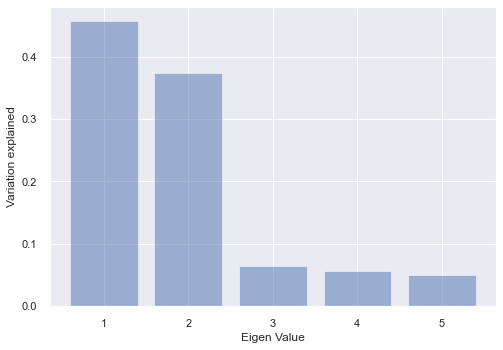

<IPython.core.display.Javascript object>

In [96]:
# Plot percentage of variation for 5 components
plt.bar(list(range(1, 6)), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.ylabel("Variation explained")
plt.xlabel("Eigen Value")
plt.show()

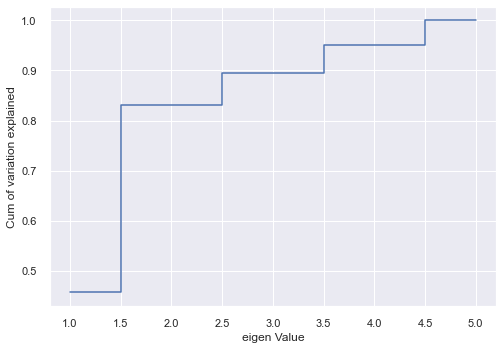

<IPython.core.display.Javascript object>

In [97]:
# Plot cumulative sum of percentage of variation for 5 components
plt.step(list(range(1, 6)), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen Value")
plt.show()

#### Observation : 
1. Two components are able to explain 83% of variance. So we can reduce dimension from 5 to 2 for better visualization in 2d.

In [98]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(alllife_data_subset_scaled_df.iloc[:, 0:5])
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

In [99]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.8316306088851678

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

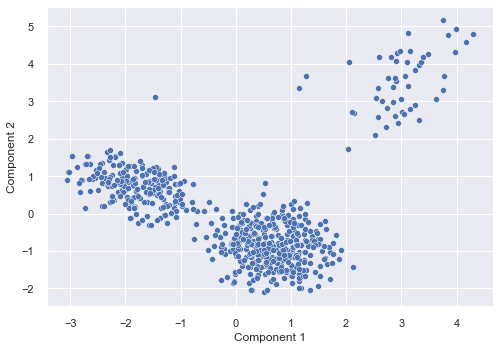

<IPython.core.display.Javascript object>

In [100]:
# Plot scatterplot to visualize two components in 2 dimension
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

#### Observation : 
1. There is atlest three clusters seen in scatter plot

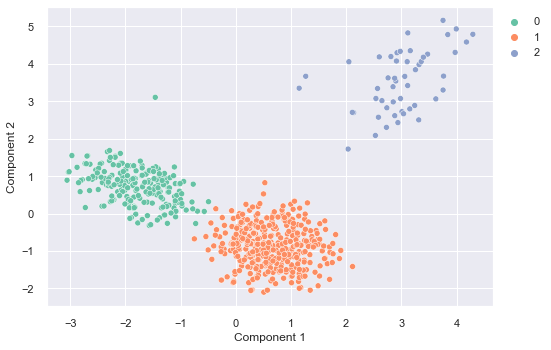

<IPython.core.display.Javascript object>

In [101]:
# Plot scatterplot to visualize two components in 2 dimension with reference to K Means clusters
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=alllife_data["K_Means_Clusters"],
    palette="Set2",
)
plt.legend(bbox_to_anchor=(1, 1))

#### Observation : 
1. K Means clusters clearly distinguishes all three clusters seen in scatter plot

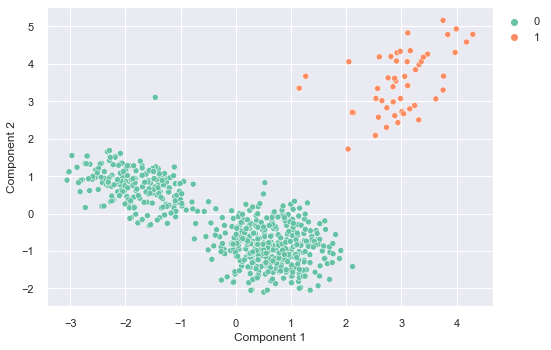

<IPython.core.display.Javascript object>

In [102]:
# Plot scatterplot to visualize two components in 2 dimension with reference to Hierarchical clusters
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=alllife_data["HC_Clusters"],
    palette="Set2",
)
plt.legend(bbox_to_anchor=(1, 1))

#### Observation : 
1. Hierarchical clusters doesnt distinguishes all three clusters seen in scatter plot. Instead, it shows two clusters as one.

### 11. Actionable Insights & Recommendations

### Actionable Insights:

**A. Insights From Data Analysis :** Data analysis on customers data was completed. Features such as Average Credit Limit and Total Credit Cards gives information on how much customers spend using their credit cards. Features such as Total_visits_bank, Total_calls_made and Total_visits_online gives information on how customers uses their credit cards and how they interact with bank for services. Customers can be grouped based on which type of service they use more. Customers with high credit card limits and more credit cards prefers online services. Whereas, others prefer visiting bank and making calls. 


**B. K Means vs Hierarchical Clustering :** Both K Means and Hierarchical clustering techniques were applied. Elbow method applied for K Means shows 3 clusters as appropriate with Silhoutte score as 0.54. However, Dendrogram method for Hierarchical shows 2 clusters as appropriate with Silhoutte score as 0.57. K Means was able to create 3 clusters to distinguish customers based on their preferred services such as visiting banks, making calls and online services. Whereas, Hierarchical clustering was able to create 2 clusters to distinguish customers who does online transactions or not.


**C. Best Clustering Result :** The best clustering results were produced by **"K Means Clustering"**. It has clearly distinguished three clusters of customers based on their preferred method of services. This helps Bank to form policies to serve those customers accordingly.


**D. Clusters :** Customers can be segmented into three categories:

**1) Cluster "0" :** 
*  There are 224 customers in this cluster. 
*  This is the second largest customer cluster. 
*  Their Average Credit Limit is very low. They have very few credit cards. 
*  They mostly prefer **calling** bank for their support requests. They dont visit bank or do online transactions much.

**2) Cluster "1" :** 
*  There are 386 customers in this cluster. 
*  This is the largest customer cluster. 
*  Their Average Credit Limit is at moderate level. They have moderate number of credit cards. 
*  They mostly prefer **visiting** bank for their support requests. They dont make calls or do online transactions much.

**3) Cluster "2" :** 
*  There are only 50 customers in this cluster. 
*  This is the smallest customer cluster. 
*  Their Average Credit Limit is very high. They have large number of credit cards. 
*  They mostly prefer **online** banking for making transactions and support requests. They dont make calls or visit bank much.


### Recommendations :


   1) In order to improve penetration into the market, personalized campaigns must be done based on each customer segments. For example, customers in cluster 0 must be campaigned on calling services, customers in cluster 1 must be campaigned on visiting services, customers in cluster 2 must be campaigned on online services.
   
   2) Large proportion of customers uses calling and visiting bank for their services. So large number of call agents and in-person assistance is required for large number of customers. So a shortage of these agents can cause poor service feedback from customers. So in order to improve customers perception of poor services, Bank can also promote using their online services to customers in these segments. 
   
   3) In order to ensure customers queries are resolved faster, either increase or train support staff for call and in-person services. Or, promote online services to customers in clusters 0 and 1.
